Data Set Name: Autistic Spectrum Disorder Screening Data for Toddlers –
Date: July, 22, 2018.
Author: Dr Fadi Thabtah
Abstract: Autistic Spectrum Disorder (ASD) is a neurodevelopmental  condition associated with significant healthcare costs, and early diagnosis can significantly reduce these. Unfortunately, waiting times for an ASD diagnosis are lengthy and procedures are not cost effective. The economic impact of autism and the increase in the number of ASD cases across the world reveals an urgent need for the development of easily implemented and effective screening methods. Therefore, a time-efficient and accessible ASD screening is imminent to help health professionals and inform individuals whether they should pursue formal clinical diagnosis.  The rapid growth in the number of ASD cases worldwide necessitates datasets related to behaviour traits. However, such datasets are rare making it difficult to perform thorough analyses to improve the efficiency, sensitivity, specificity and predictive accuracy of the ASD screening process. Presently, very limited autism datasets associated with clinical or screening are available and most of them are genetic in nature. Hence, we propose a new dataset related to autism screening of toddlers that contained influential features to be utilised for further analysis especially in determining autistic traits and improving the classification of ASD cases. In this dataset, we record ten behavioural features (Q-Chat-10) plus other individuals characteristics that have proved to be effective in detecting the ASD cases from controls in behaviour science.
Source: Fayez Thabtah
Department of Digital Technology
Manukau Institute of Technology,
Auckland, New Zealand
fadi.fayez@manukau.ac.nz
Data Type: Predictive and Descriptive: Nominal / categorical, binary and continuous
Task: Classification
Attribute Type: Categorical, continuous and binary  
Area: Medical, health and social science
Format Type: Non-Matrix
Does your data set contain missing values? No
Number of Instances (records in your data set): 1054
Number of Attributes (fields within each record): 18 including the class variable
Attribute Information:  For Further information about the attributes/feature see below table.

Attributes:
A1-A10: Items within Q-Chat-10  in which questions possible answers : “Always, Usually, Sometimes, Rarly & Never” items’ values are mapped to “1” or “0” in the dataset. For questions 1-9 (A1-A9) in Q-chat-10,  if the respose was  Sometimes / Rarly / Never “1” is assigned to the question (A1-A9). However, for question 10 (A10), if the respose was Always / Usually / Sometimes then “1” is assigned to that question. If the user obtained More than 3 Add points together for all ten questions. If your child scores more than 3 (Q-chat-10- score) then there is a potential ASD traits otherwise no ASD traits are observed.
The remaining features in the datasets are collected from the “submit” screen in the ASDTests screening app. It should be noted that the class varaible was assigned automatically based on the score obtained by the user while undergoing the screening process using the ASDTests app.

Relevant Papers:  
1) Tabtah, F. (2017). Autism Spectrum Disorder Screening: Machine Learning Adaptation and DSM-5 Fulfillment. Proceedings of the 1st International Conference on Medical and Health Informatics 2017, pp.1-6. Taichung City, Taiwan, ACM.
2) Thabtah, F. (2017). ASDTests. A mobile app for ASD screening. www.asdtests.com [accessed December  20th, 2017].
3) Thabtah, F. (2017). Machine Learning in Autistic Spectrum Disorder Behavioural Research: A Review. Informatics for Health and Social Care Journal.
4) Thabtah F, Kamalov F., Rajab K (2018) A new computational intelligence approach to detect autistic features for autism screening. International Journal of Medical Infromatics, Volume 117, pp. 112-124.

Table 1: Details of variables mapping to the Q-Chat-10 screening methods
Variable in Dataset	Corresponding Q-chat-10-Toddler Features
A1	 Does your child look at you when you call his/her name?
A2	How easy is it for you to get eye contact with your child?
A3	Does your child point to indicate that s/he wants something? (e.g. a toy that is
out of reach)
A4	Does your child point to share interest with you? (e.g. poin9ng at an
interes9ng sight)
A5	Does your child pretend? (e.g. care for dolls, talk on a toy phone)
A6	Does your child follow where you’re looking?
A7	If you or someone else in the family is visibly upset, does your child show signs
of wan9ng to comfort them? (e.g. stroking hair, hugging them)
A8	Would you describe your child’s first words as:
A9	Does your child use simple gestures? (e.g. wave goodbye)
A10	Does your child stare at nothing with no apparent purpose?









It is recommended to discard the Score variable as it has been used to assign the class label so if you keep the score variable the models derived might be overfitted.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/Toddler Autism dataset July 2018.csv')
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


##structure investigation

In [ ]:
df.shape

(1054, 19)

In [ ]:
#the number of categorical and numerical data
pd.value_counts(df.dtypes)

int64     13
object     6
Name: count, dtype: int64

In [ ]:
#lets first check for the non numeric features
df.select_dtypes(exclude = "number").head()

,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,f,middle eastern,yes,no,family member,No
1,m,White European,yes,no,family member,Yes
2,m,middle eastern,yes,no,family member,Yes
3,m,Hispanic,no,no,family member,Yes
4,f,White European,no,yes,family member,Yes


In [ ]:
df.describe(exclude = "number")

,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
count,1054,1054,1054,1054,1054,1054
unique,2,11,2,2,5,2
top,m,White European,no,no,family member,Yes
freq,735,334,766,884,1018,728


<Axes: title={'center': 'unique values per feature'}>

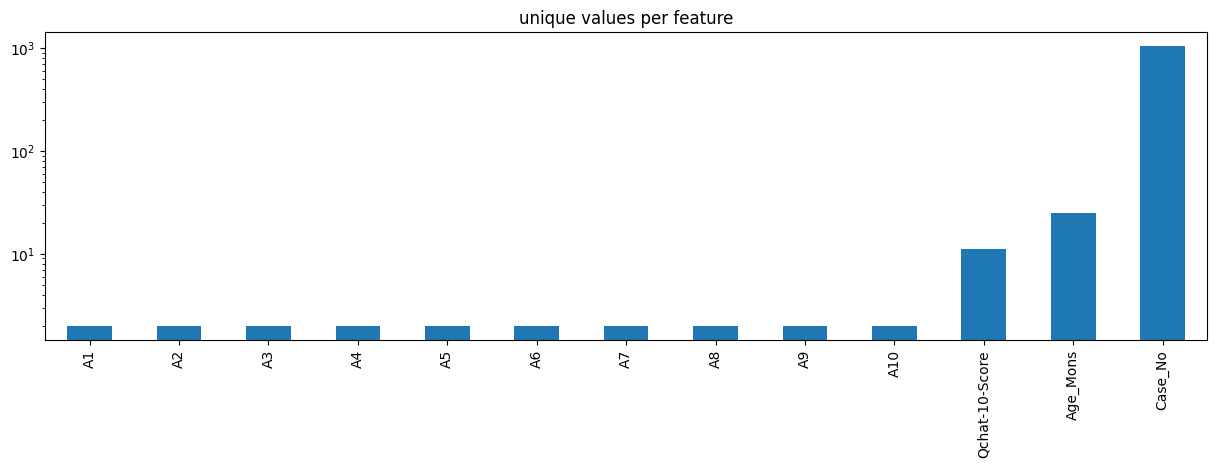

In [ ]:
##now for the numeric data
unique_values = df.select_dtypes(include = "number").nunique().sort_values()
unique_values.plot.bar(logy = True,figsize = (15,4),title = "unique values per feature")

##quality investigation

In [ ]:
df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

In [ ]:
#checking number of duplicates while ignoring the index feature
n_duplicates = df.drop(labels = ['Case_No'],axis = 1).duplicated().sum()
n_duplicates

79

best way is to drop all the duplicatss from the datset

In [ ]:
#drop duplicates from all the columns and
columns_considered = df.drop(labels = ['Case_No'],axis =1).columns
df = df.drop_duplicates(subset = columns_considered)
df.shape

(975, 19)

Text(0, 0.5, 'Sample number')

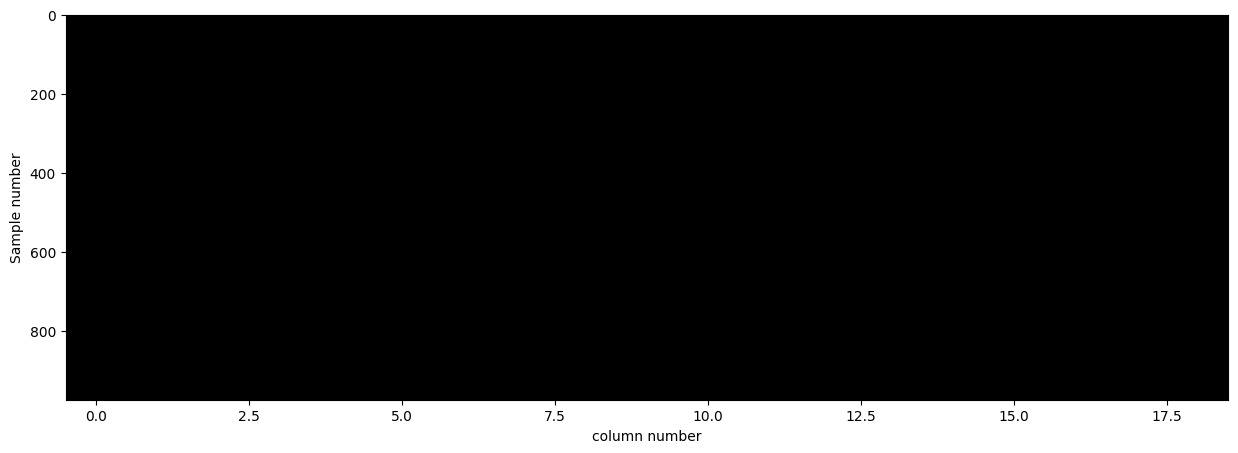

In [ ]:
#missing values per sample
plt.figure(figsize = (15,5))
plt.imshow(df.isna(),aspect = "auto",interpolation = "nearest",cmap = "gray",vmin = 0,vmax = 255)
plt.xlabel("column number")
plt.ylabel("Sample number")

In [ ]:
#no missing values
#as we know that there is no missing value
#still we can check for missing values per coloumn as well
#plot the sorted order of missing values

<Axes: title={'center': 'missign values per feature'}, ylabel='number of missign values per feature'>

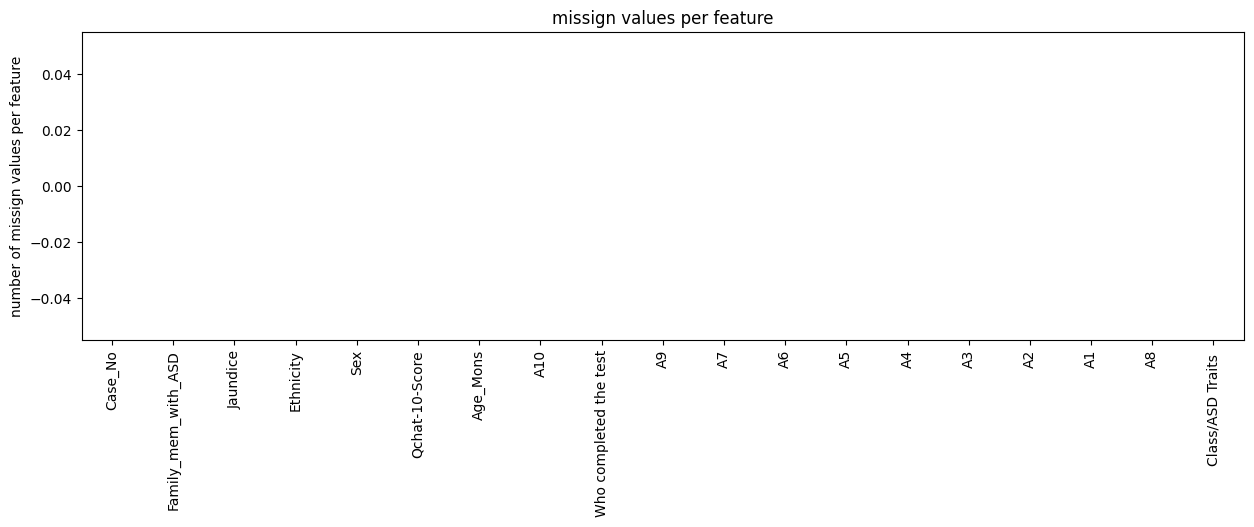

In [ ]:
df.isna().sum().sort_values().plot(
    kind = "bar",figsize = (15,4),
    title = "missign values per feature",
    ylabel = "number of missign values per feature",
)

In [ ]:
#same results here as well no missign values

In [ ]:
#casenumber is just a number so it can be dropped
df = df.drop('Case_No',axis = 1).copy()

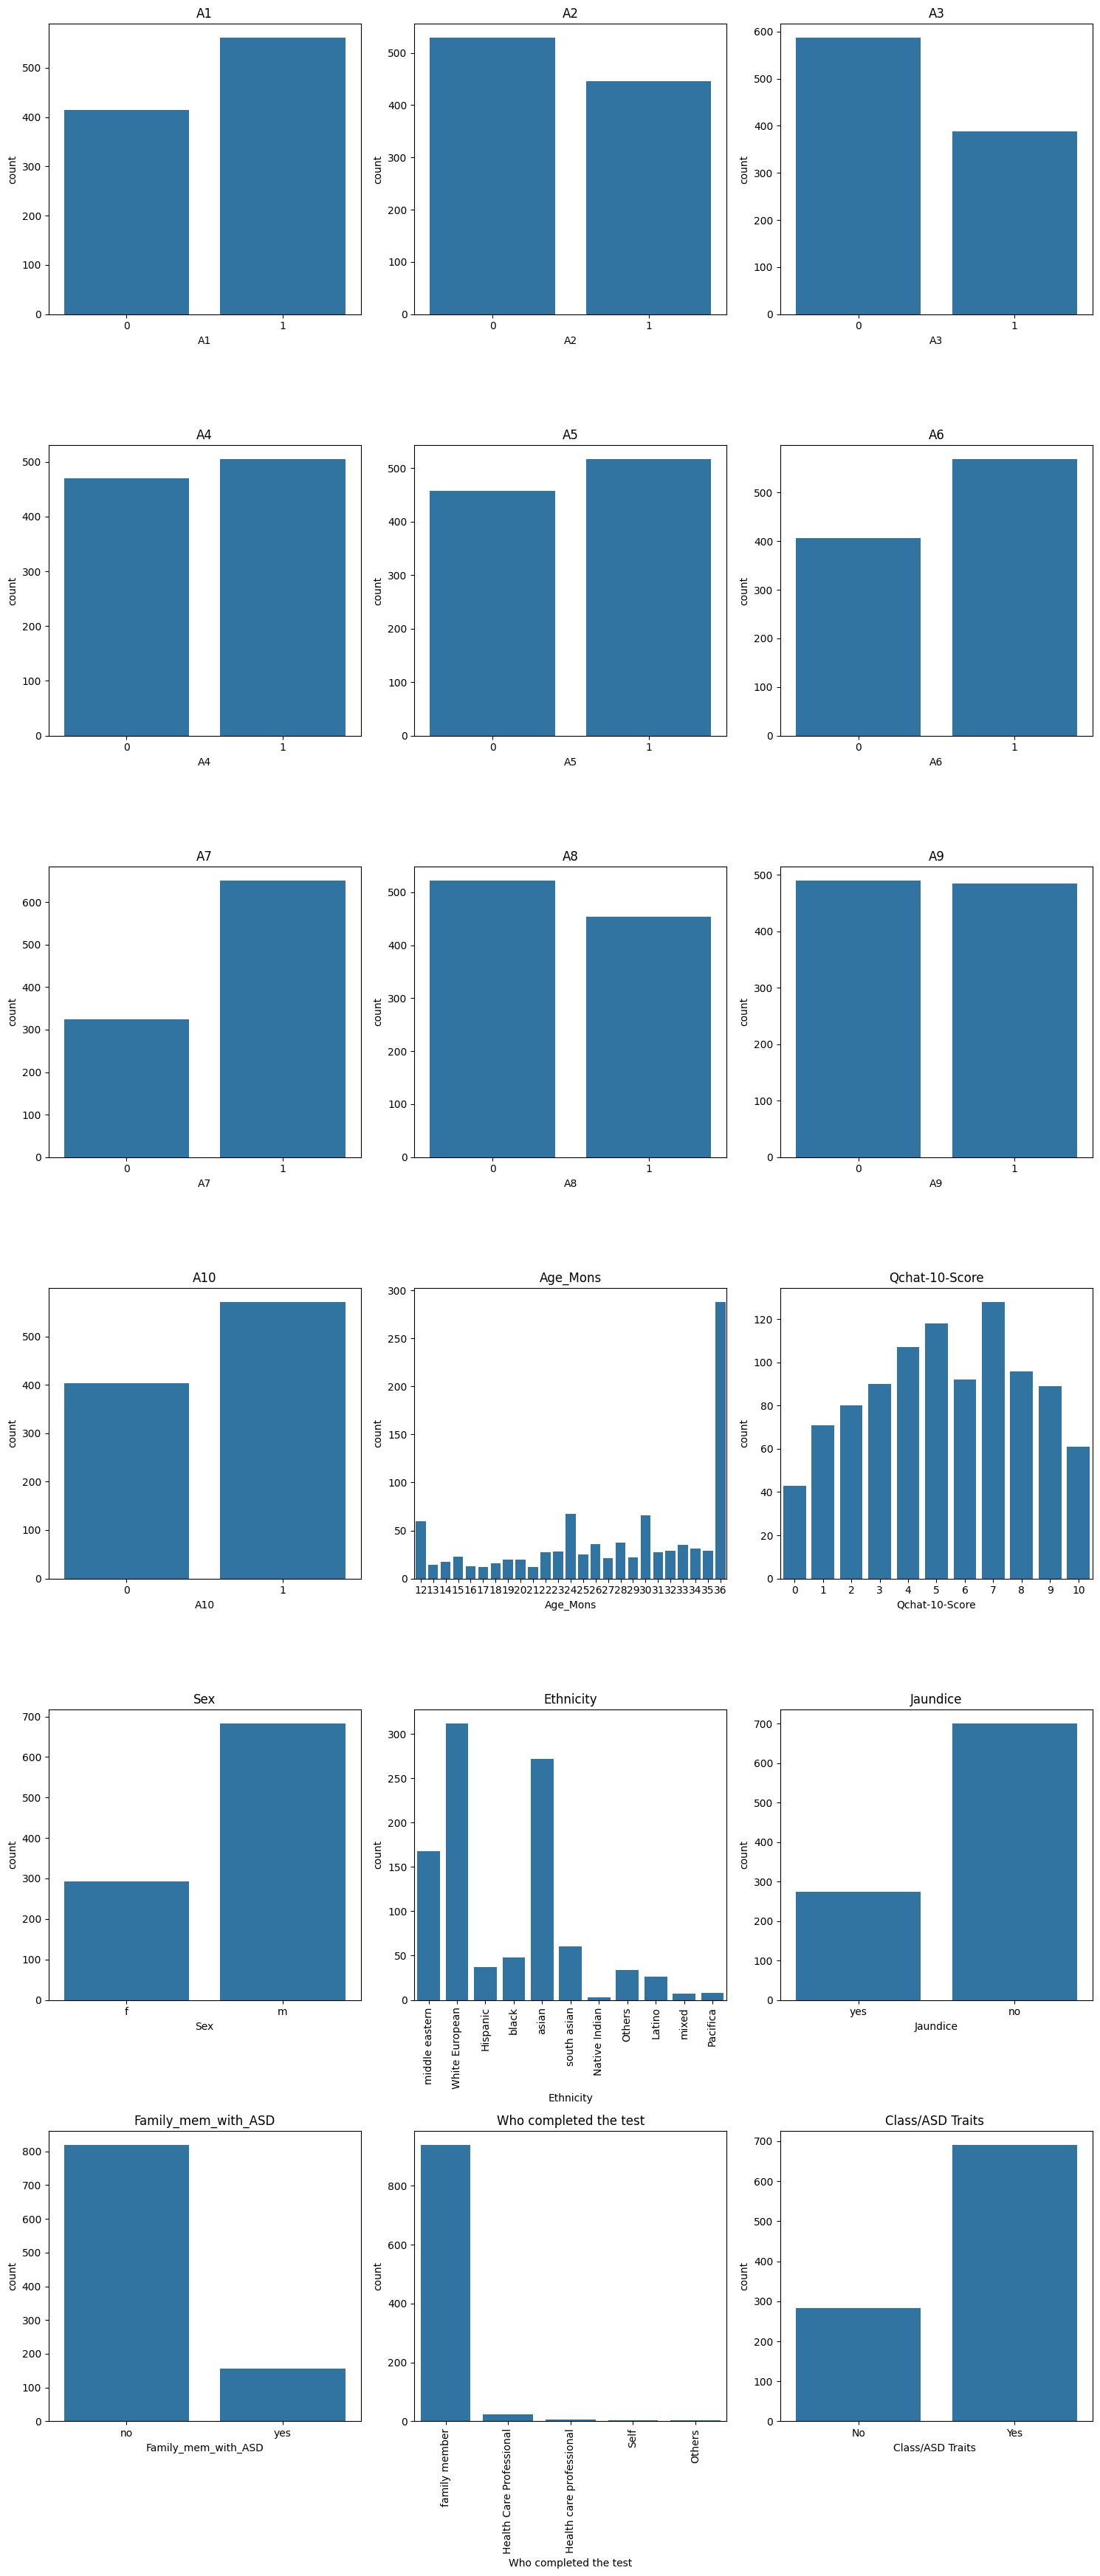

In [ ]:
#count plot for each feature
fig,axes = plt.subplots(6,3,figsize = (15,35))
axes = axes.ravel()
for i,col in enumerate(df.iloc[:,:]):
  sns.countplot(x = df[col],ax = axes[i])
  axes[i].set_title(col)
  if col == "Who completed the test" or col == "Ethnicity" or col == "Age Months":
    axes[i].tick_params(axis = "x",labelrotation = 90)
plt.tight_layout()

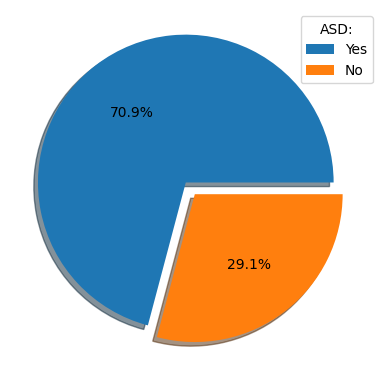

In [ ]:
#lets look at the percentage of autistic samples
labels = ["Yes", "No"]
myexplode = [0.1, 0]
plt.pie(df.groupby('Class/ASD Traits ').size().reindex(labels),explode = myexplode, shadow = True,autopct='%1.1f%%')
plt.legend(title = "ASD:",labels = labels)
plt.show()

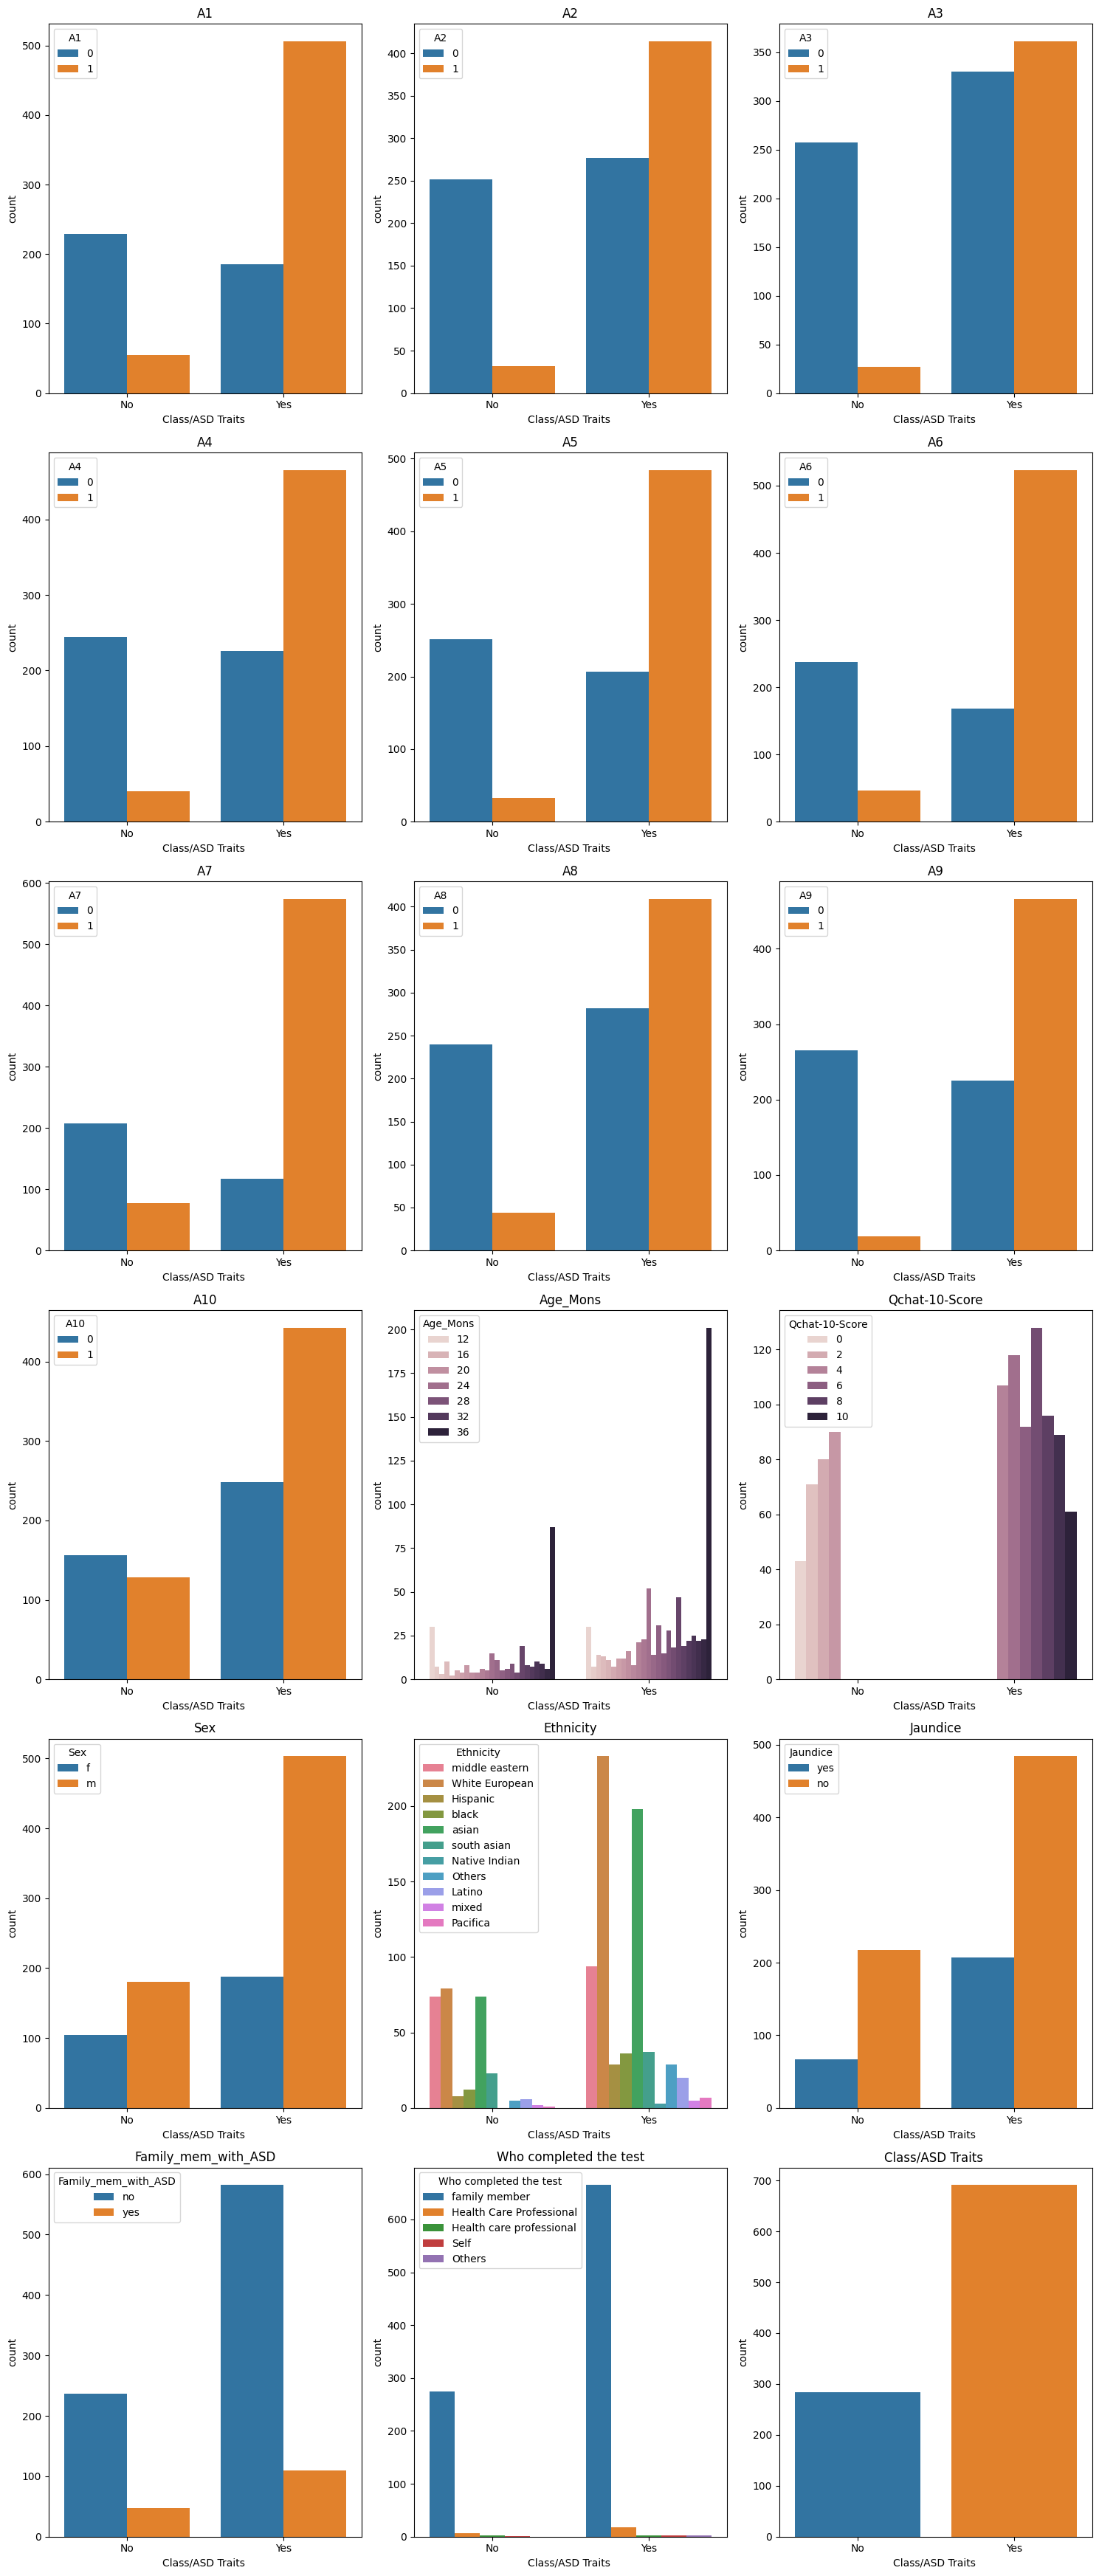

In [ ]:
fig,axes = plt.subplots(6,3,figsize = (15,35))
axes = axes.ravel()
for i,col in enumerate(df.iloc[:,:]):
  sns.countplot(x = df['Class/ASD Traits '],hue = df[col],ax = axes[i])
  axes[i].set_title(col)
plt.tight_layout()


start analysing every column

##ethinicity

In [ ]:
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

In [ ]:
df.groupby('Ethnicity').size()

Ethnicity
Hispanic           37
Latino             26
Native Indian       3
Others             34
Pacifica            8
White European    312
asian             272
black              48
middle eastern    168
mixed               7
south asian        60
dtype: int64

<ipython-input-21-34333cba7700>:4: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend('ethinicy:',labels = labels)


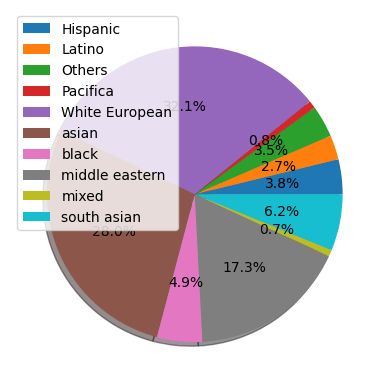

In [ ]:
plt.figsize = (20,8)
labels = ['Hispanic','Latino','Others','Pacifica','White European','asian','black','middle eastern','mixed','south asian']
plt.pie(df.groupby('Ethnicity').size().reindex(labels),shadow = True,autopct = '%1.1f%%')
plt.legend('ethinicy:',labels = labels)

white europeans  have the highets percentage in our dataset,fllowing up wiht asians and pacifica having the smallest number

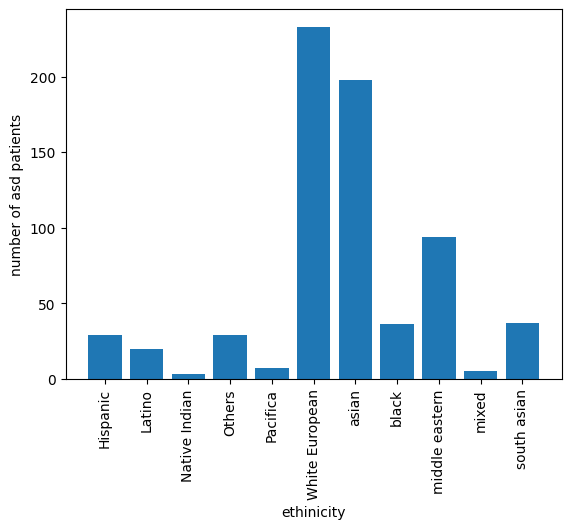

In [ ]:
##from which region do the maximum asd patients come from
asd_ethi_count = df[df['Class/ASD Traits ']=='Yes'].groupby('Ethnicity').size()
bars = plt.bar(asd_ethi_count.index,asd_ethi_count.values)
plt.xticks(rotation = 90)
plt.xlabel('ethinicity')
plt.ylabel('number of asd patients')
plt.show()

inference: white europeans have most asd cases in the world followed by asians

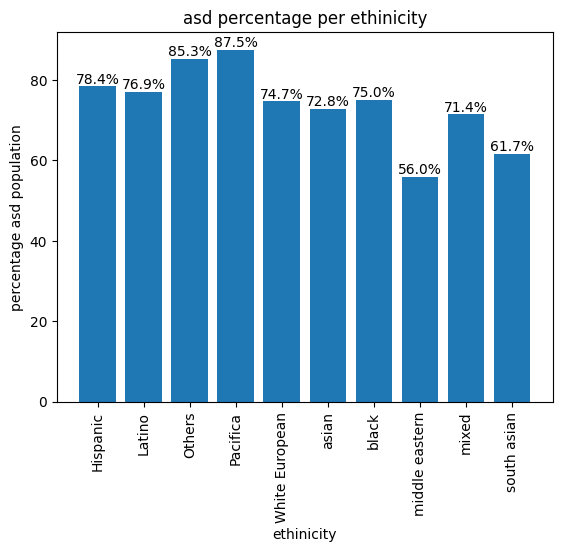

In [ ]:
#which ethinicity has the highest number of asd cases
ethi_counts = df.groupby('Ethnicity').size()
asd_ethi_counts = df[df['Class/ASD Traits ']=='Yes'].groupby('Ethnicity').size()
asd_ethi_percentage = (asd_ethi_counts/ethi_counts)*100
bars = plt.bar(asd_ethi_percentage.reindex(labels).index,asd_ethi_percentage.reindex(labels).values)
plt.xlabel('ethinicity')
plt.ylabel('percentage asd population')
plt.title('asd percentage per ethinicity')
plt.xticks(rotation = 90)
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}%', va='bottom', ha='center')

pacifica has highest percentage of its population been affected by asd

In [ ]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


sex

In [ ]:
df.groupby('Sex').size()

Sex
f    292
m    683
dtype: int64

Text(0, 0.5, 'numeber of asd patientgs')

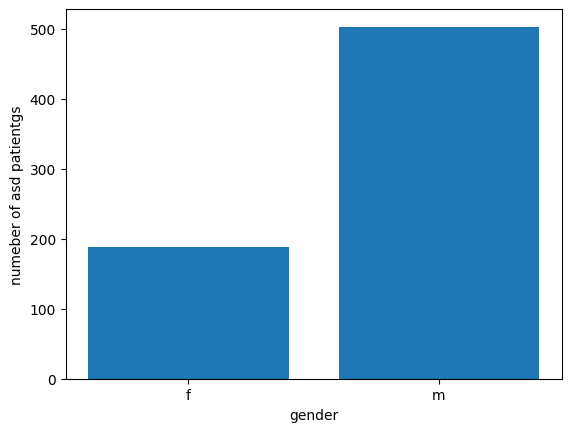

In [ ]:
sex_asd = df[df['Class/ASD Traits ']=='Yes'].groupby('Sex').size()
labels = ['Male','female']
bars = plt.bar(sex_asd.index,sex_asd.values)
plt.xlabel('gender')
plt.ylabel('numeber of asd patientgs')


males are more prevalent to asd than females

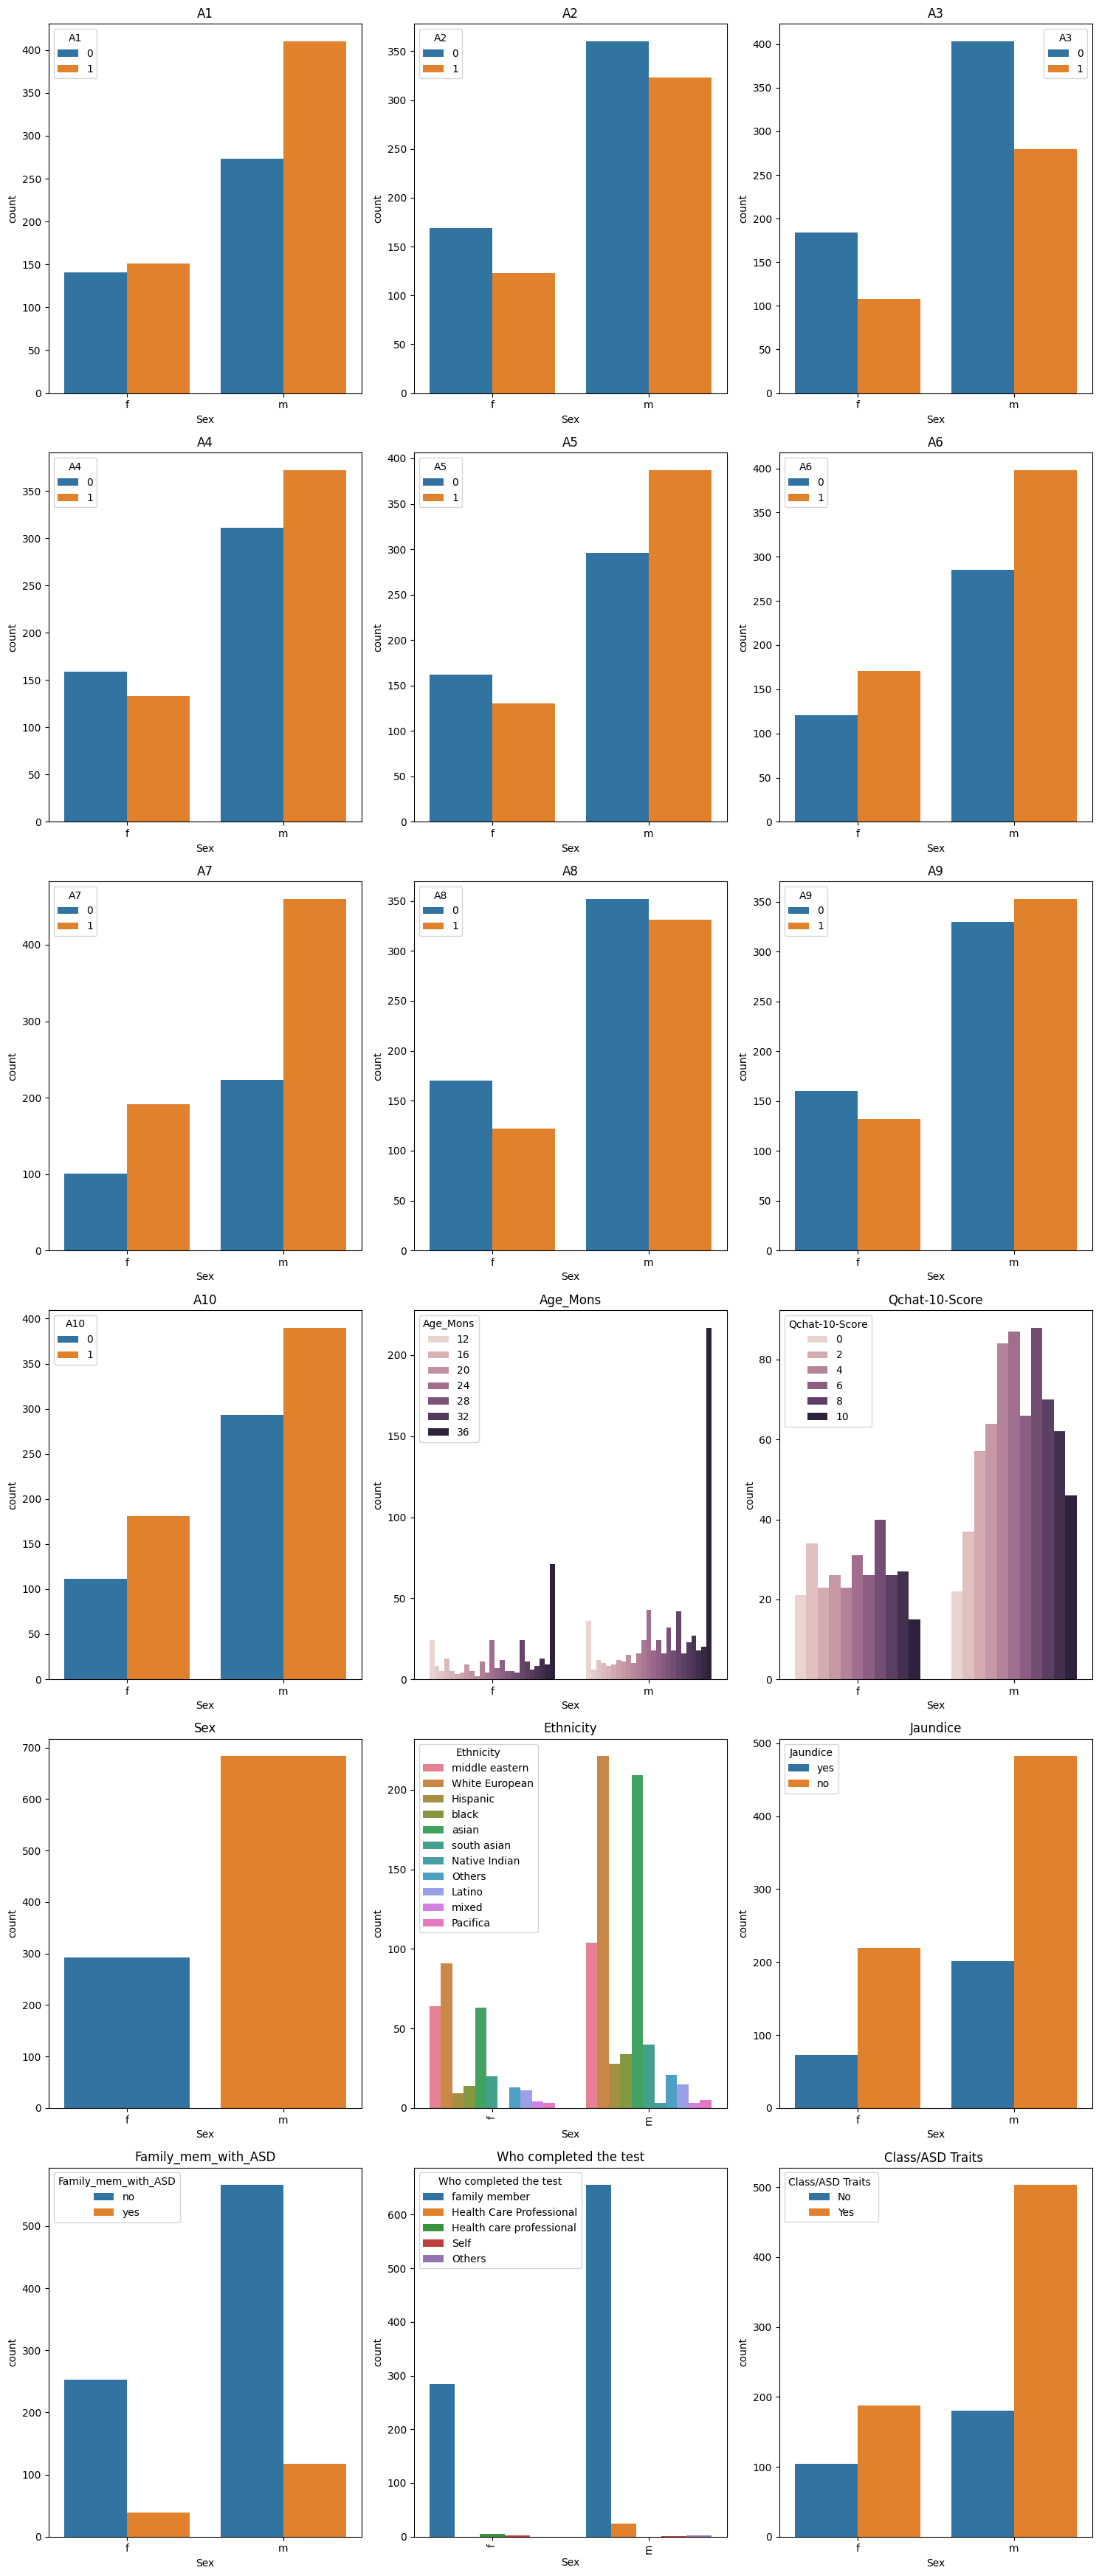

In [ ]:
fig,axes = plt.subplots(6,3,figsize = (15,35))
axes = axes.ravel()
for i,col in enumerate(df.iloc[:,:]):
  sns.countplot(x = df['Sex'],ax = axes[i],hue = df[col])
  axes[i].set_title(col)
  if col == "Who completed the test" or col == "Ethnicity" or col == "Age Months":
    axes[i].tick_params(axis = "x",labelrotation = 90)
plt.tight_layout()

In [ ]:
male_df = df[df['Sex']=='m']
male_qchat = male_df['Qchat-10-Score'].mean()
male_qchat

5.423133235724744

In [ ]:
male_df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
1,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
5,1,1,0,0,1,1,1,1,1,1,21,8,m,black,no,no,family member,Yes
6,1,0,0,1,1,1,0,0,1,0,33,5,m,asian,yes,no,family member,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,1,1,1,1,1,1,1,1,1,1,30,10,m,middle eastern,no,no,Health Care Professional,Yes
1050,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,Yes
1051,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,Yes
1052,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,family member,No


In [ ]:
female_df = df[df['Sex']=='f']
female_qchat = female_df['Qchat-10-Score'].mean()
female_qchat

4.938356164383562

qchat score for males is higher than femals

jaundice

In [ ]:
df.groupby('Jaundice').size()

Jaundice
no     701
yes    274
dtype: int64

Text(0, 0.5, 'no of asd patients')

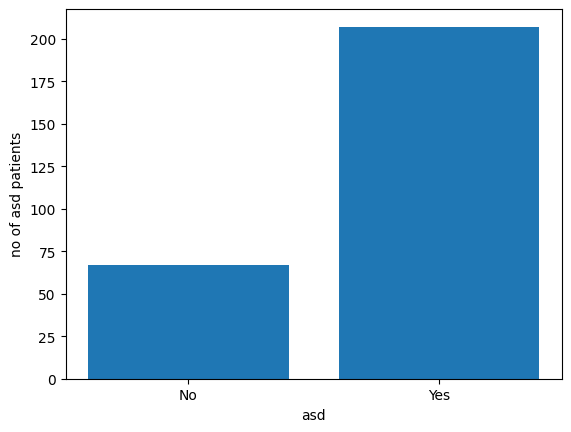

In [ ]:
#toddlers who have jaundice and then have asd
jaundice_asd_df = df[df['Jaundice']=='yes'].groupby('Class/ASD Traits ').size()
bars = plt.bar(jaundice_asd_df.index,jaundice_asd_df.values)
plt.xlabel('asd')
plt.ylabel('no of asd patients')

Text(0, 0.5, 'number')

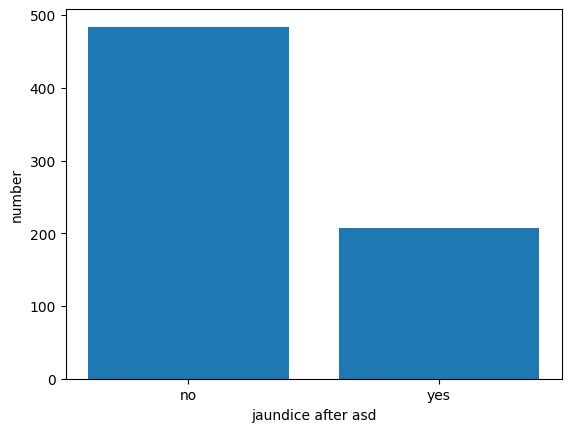

In [ ]:
#toddlers who have asd and then have jaundice
asd_jaundice_df = df[df['Class/ASD Traits ']=='Yes'].groupby('Jaundice').size()
bars = plt.bar(asd_jaundice_df.index,asd_jaundice_df.values)
plt.xlabel('jaundice after asd')
plt.ylabel('number')

having jaundice doesnt't have any relationship with having asd

family member with asd

In [ ]:
df.groupby('Family_mem_with_ASD').size()

Family_mem_with_ASD
no     819
yes    156
dtype: int64

Text(0, 0.5, 'number of asd patients')

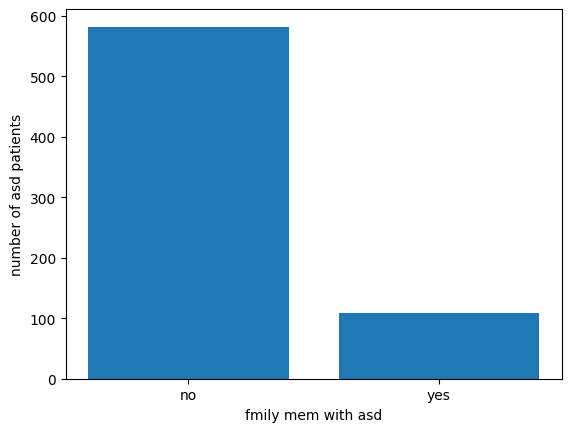

In [ ]:
family_asd = df[df['Class/ASD Traits ']=='Yes'].groupby('Family_mem_with_ASD').size()
bars = plt.bar(family_asd.index,family_asd.values)
plt.xlabel('fmily mem with asd')
plt.ylabel('number of asd patients')

this concludes that asd in not a gentic disoder

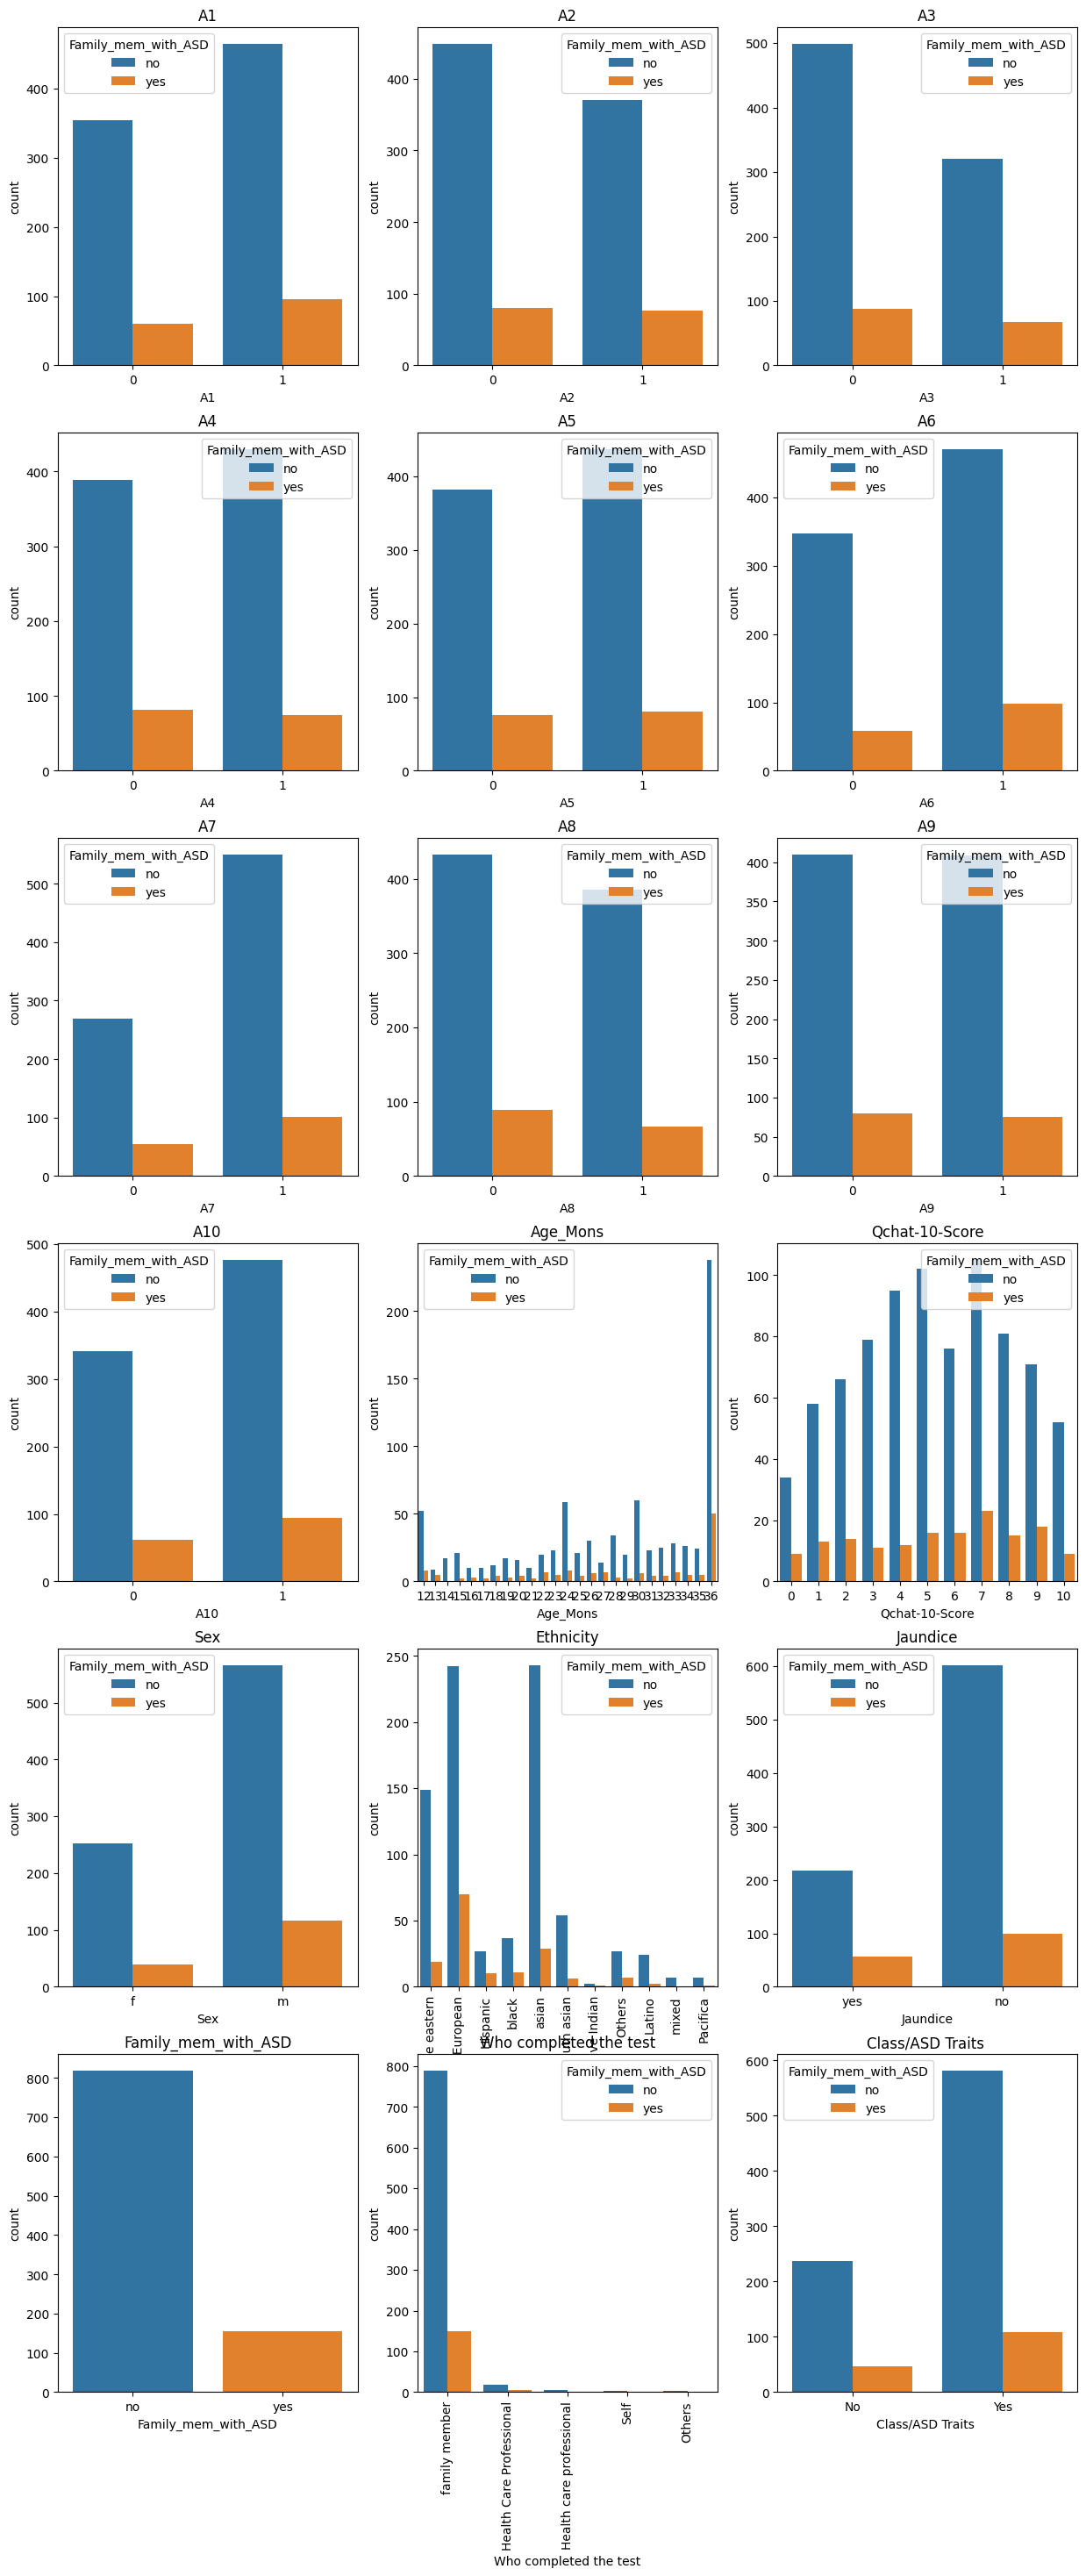

In [ ]:
fig,axes = plt.subplots(6,3,figsize = (15,35))
axes = axes.ravel()
for i,col in enumerate(df.iloc[:,:]):
  sns.countplot(x = df[col],hue = df['Family_mem_with_ASD'],ax = axes[i])
  axes[i].set_title(col)
  if col == "Who completed the test" or col == "Ethnicity" or col == "Age Months":
    axes[i].tick_params(axis = 'x',labelrotation = 90)

who completed the test

In [ ]:
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Health Care Professional'),
  Text(1, 0, 'Health care professional'),
  Text(2, 0, 'Others'),
  Text(3, 0, 'Self'),
  Text(4, 0, 'family member')])

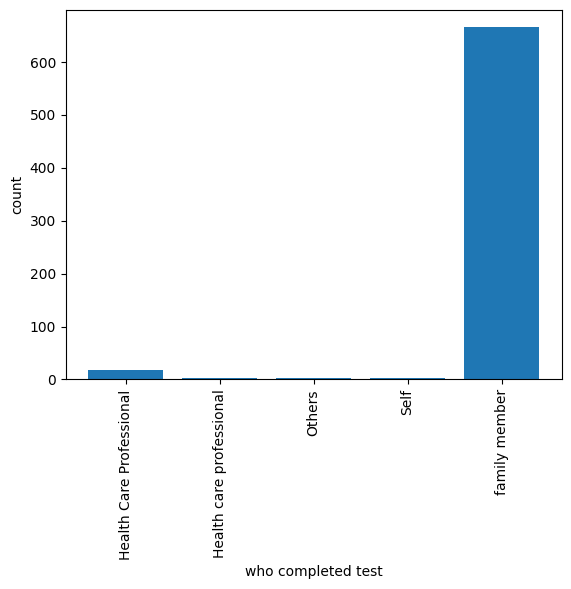

In [ ]:
test_asd_df = df[df['Class/ASD Traits ']=='Yes'].groupby('Who completed the test').size()
plt.bar(test_asd_df.index,test_asd_df.values)
plt.xlabel('who completed test')
plt.ylabel('count')
plt.xticks(rotation = 90)

most of the cases with asd the test was completed bya family member so the info can be said tobe correct

age months

In [ ]:
df.groupby('Age_Mons').size().sort_values()

Age_Mons
21     12
17     12
16     13
13     14
18     16
14     17
20     20
19     20
27     21
29     22
15     23
25     25
22     27
31     27
23     28
32     29
35     29
34     31
33     35
26     36
28     37
12     60
30     66
24     67
36    288
dtype: int64

it is evident that the highest asd cases is among 36 year olds,lets visulaize it in plot as well

Text(0, 0.5, 'count')

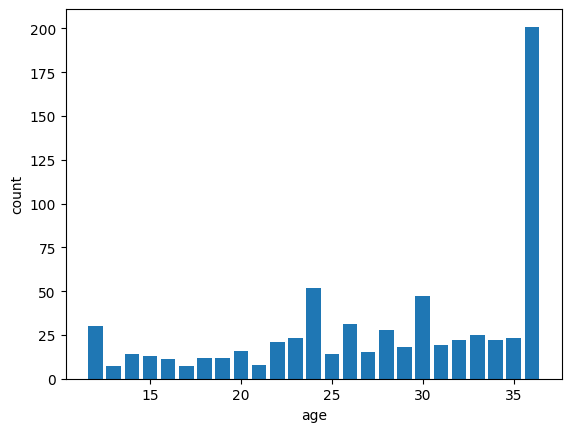

In [ ]:
age_asd_df = df[df['Class/ASD Traits ']=='Yes'].groupby('Age_Mons').size()
plt.bar(age_asd_df.index,age_asd_df.values)
plt.xlabel('age')
plt.ylabel('count')

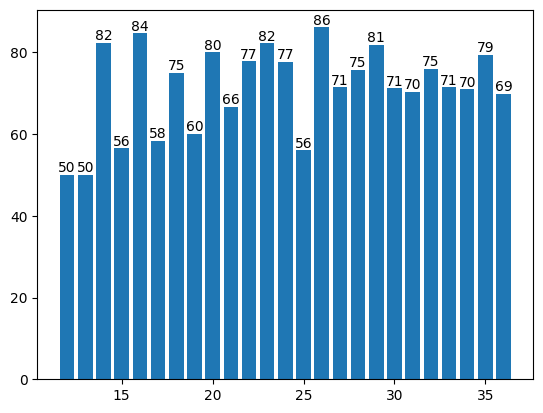

In [ ]:
#lets get the age group with highest percentage of asd traits
num_age_grps = df.groupby('Age_Mons').size()
age_asd_df = df[df['Class/ASD Traits ']=='Yes'].groupby('Age_Mons').size()
per_age_asd = (age_asd_df/num_age_grps)*100
bars = plt.bar(per_age_asd.index,per_age_asd.values)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

In [ ]:
#lets convert this age grp into year for a better visualization
df_new = pd.DataFrame()
df_new['age'] = (df['Age_Mons']/12).astype(int)
df_new['asd'] = df['Class/ASD Traits ']

<BarContainer object of 3 artists>

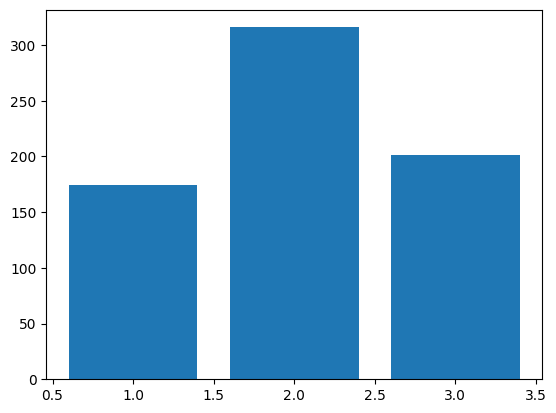

In [ ]:
age = df_new[df_new['asd'] == 'Yes'].groupby('age').size()
plt.bar(age.index,age.values)

therefore the 2 year olds are most prone to asd

q-chat-10-score

(array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 [Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6'),
  Text(7.0, 0, '7'),
  Text(8.0, 0, '8'),
  Text(9.0, 0, '9'),
  Text(10.0, 0, '10'),
  Text(11.0, 0, '11')])

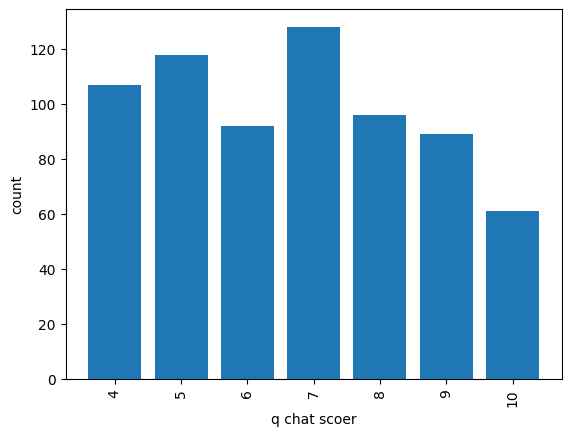

In [ ]:
qchatscore = df[df['Class/ASD Traits ']=='Yes'].groupby('Qchat-10-Score').size()
plt.bar(qchatscore.index,qchatscore.values)
plt.xlabel('q chat scoer')
plt.ylabel('count')
plt.xticks(rotation = 90)


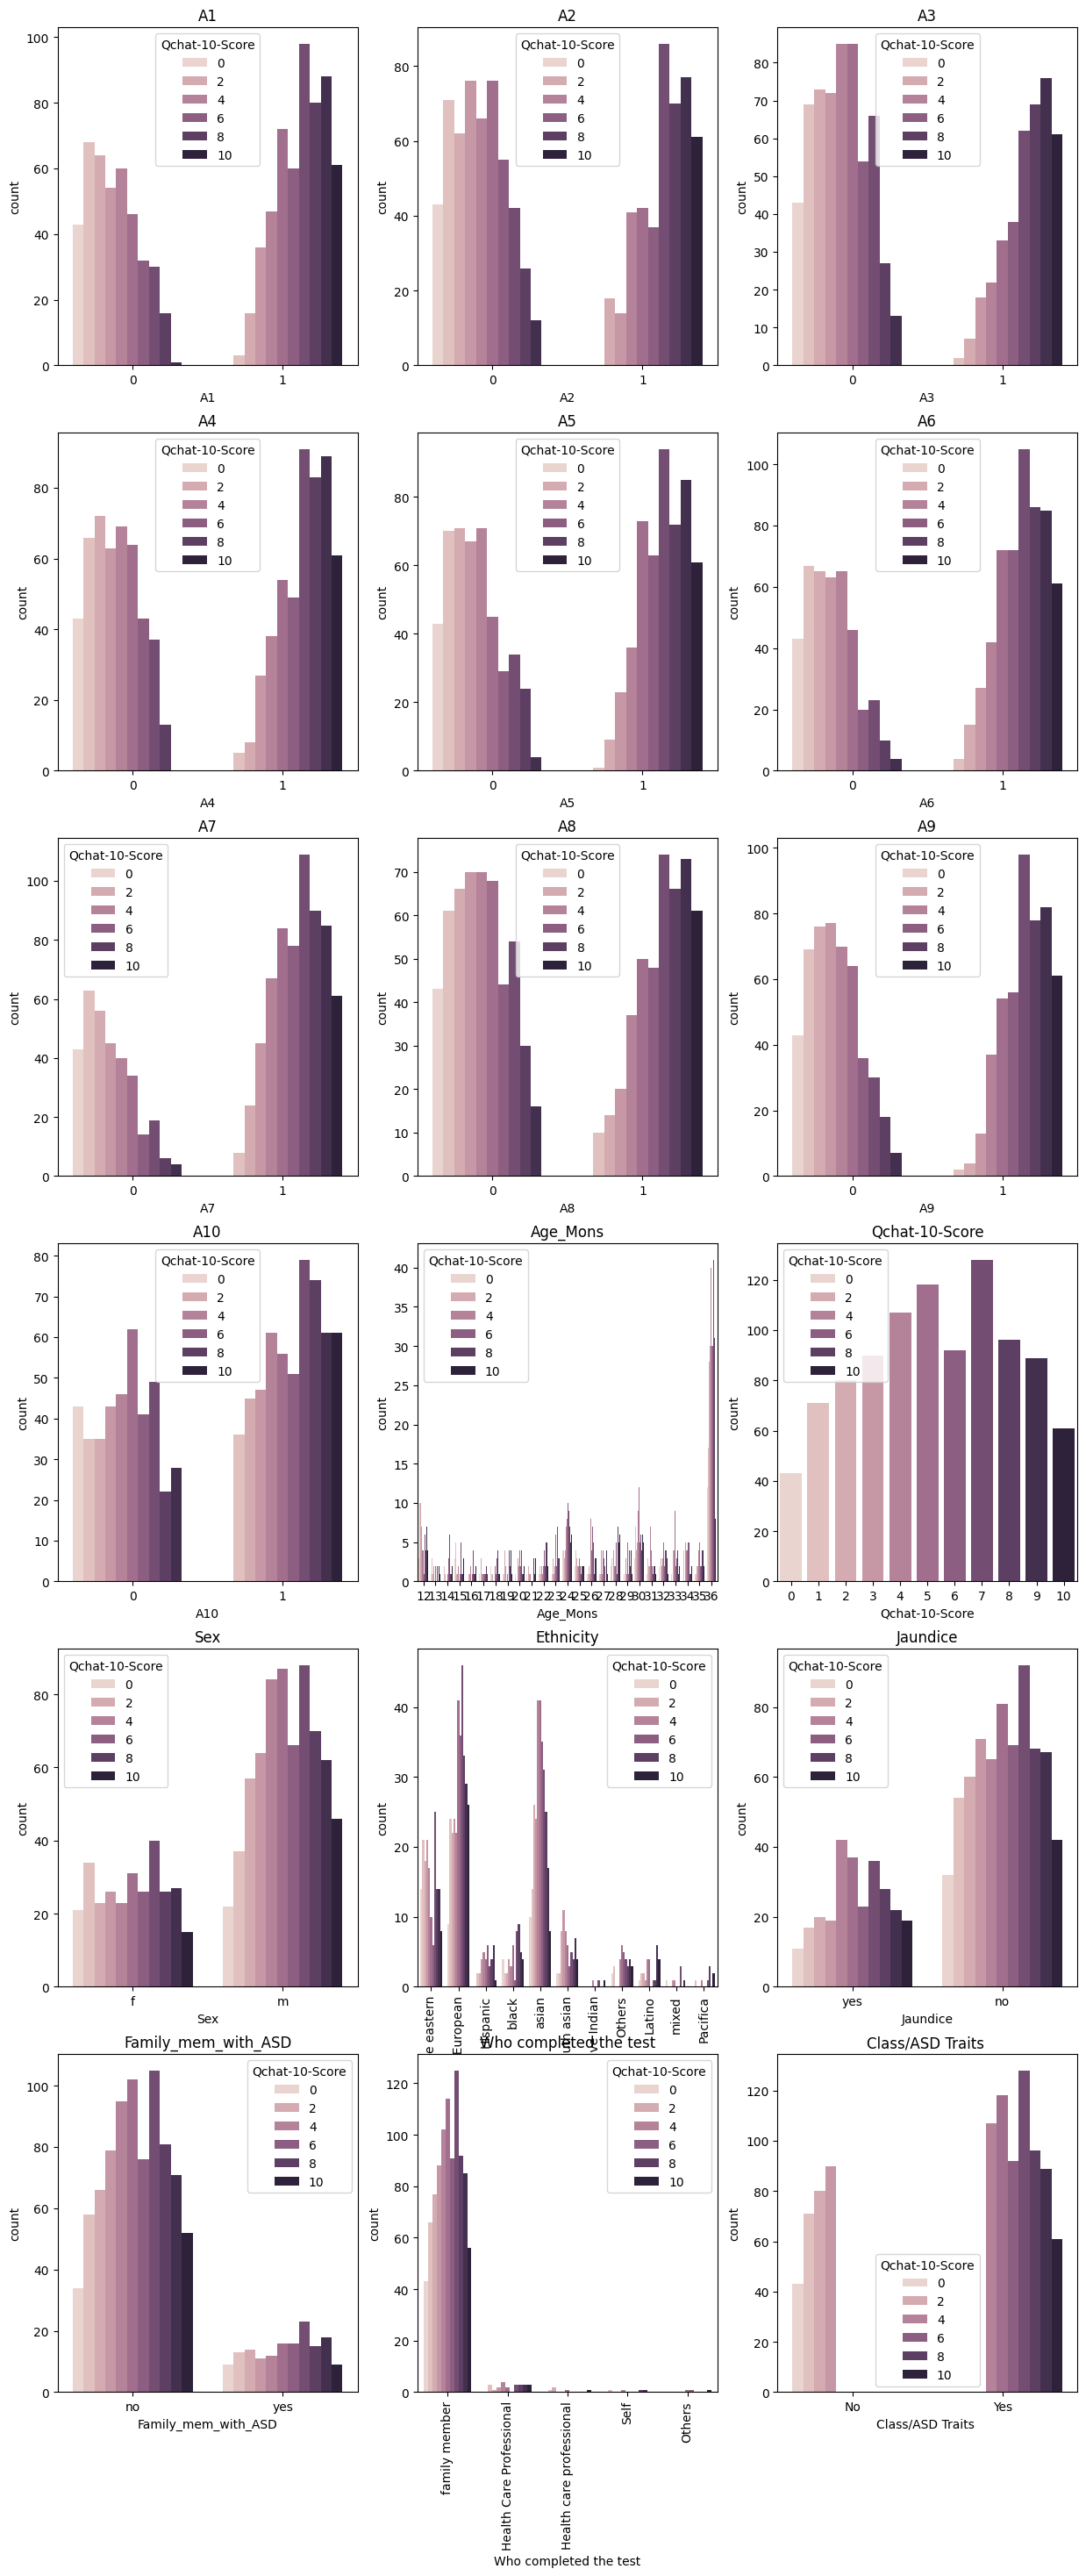

In [ ]:
fig,axes = plt.subplots(6,3,figsize = (15,35))
axes = axes.ravel()
for i,col in enumerate(df.iloc[:,:]):
  sns.countplot(x = df[col],hue = df['Qchat-10-Score'],ax = axes[i])
  axes[i].set_title(col)
  if col == "Who completed the test" or col == "Ethnicity" or col == "Age Months":
    axes[i].tick_params(axis = 'x',labelrotation = 90)

this concludes toddlers with q chat socre greater than 10 have asd

score table

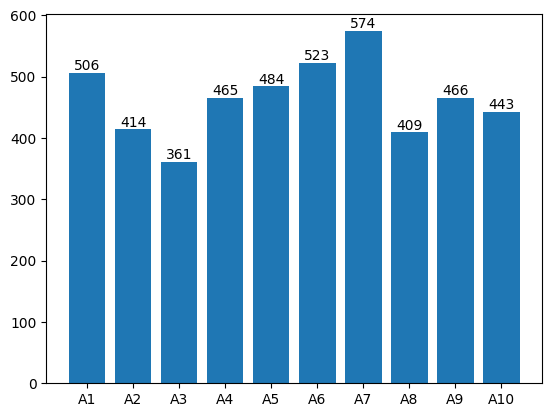

In [ ]:
df_new = df[df['Class/ASD Traits ']=='Yes']
sums = df_new[['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10']].sum()
bars = plt.bar(sums.index,sums.values)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

this shows that most of the autism patitents lack emotions

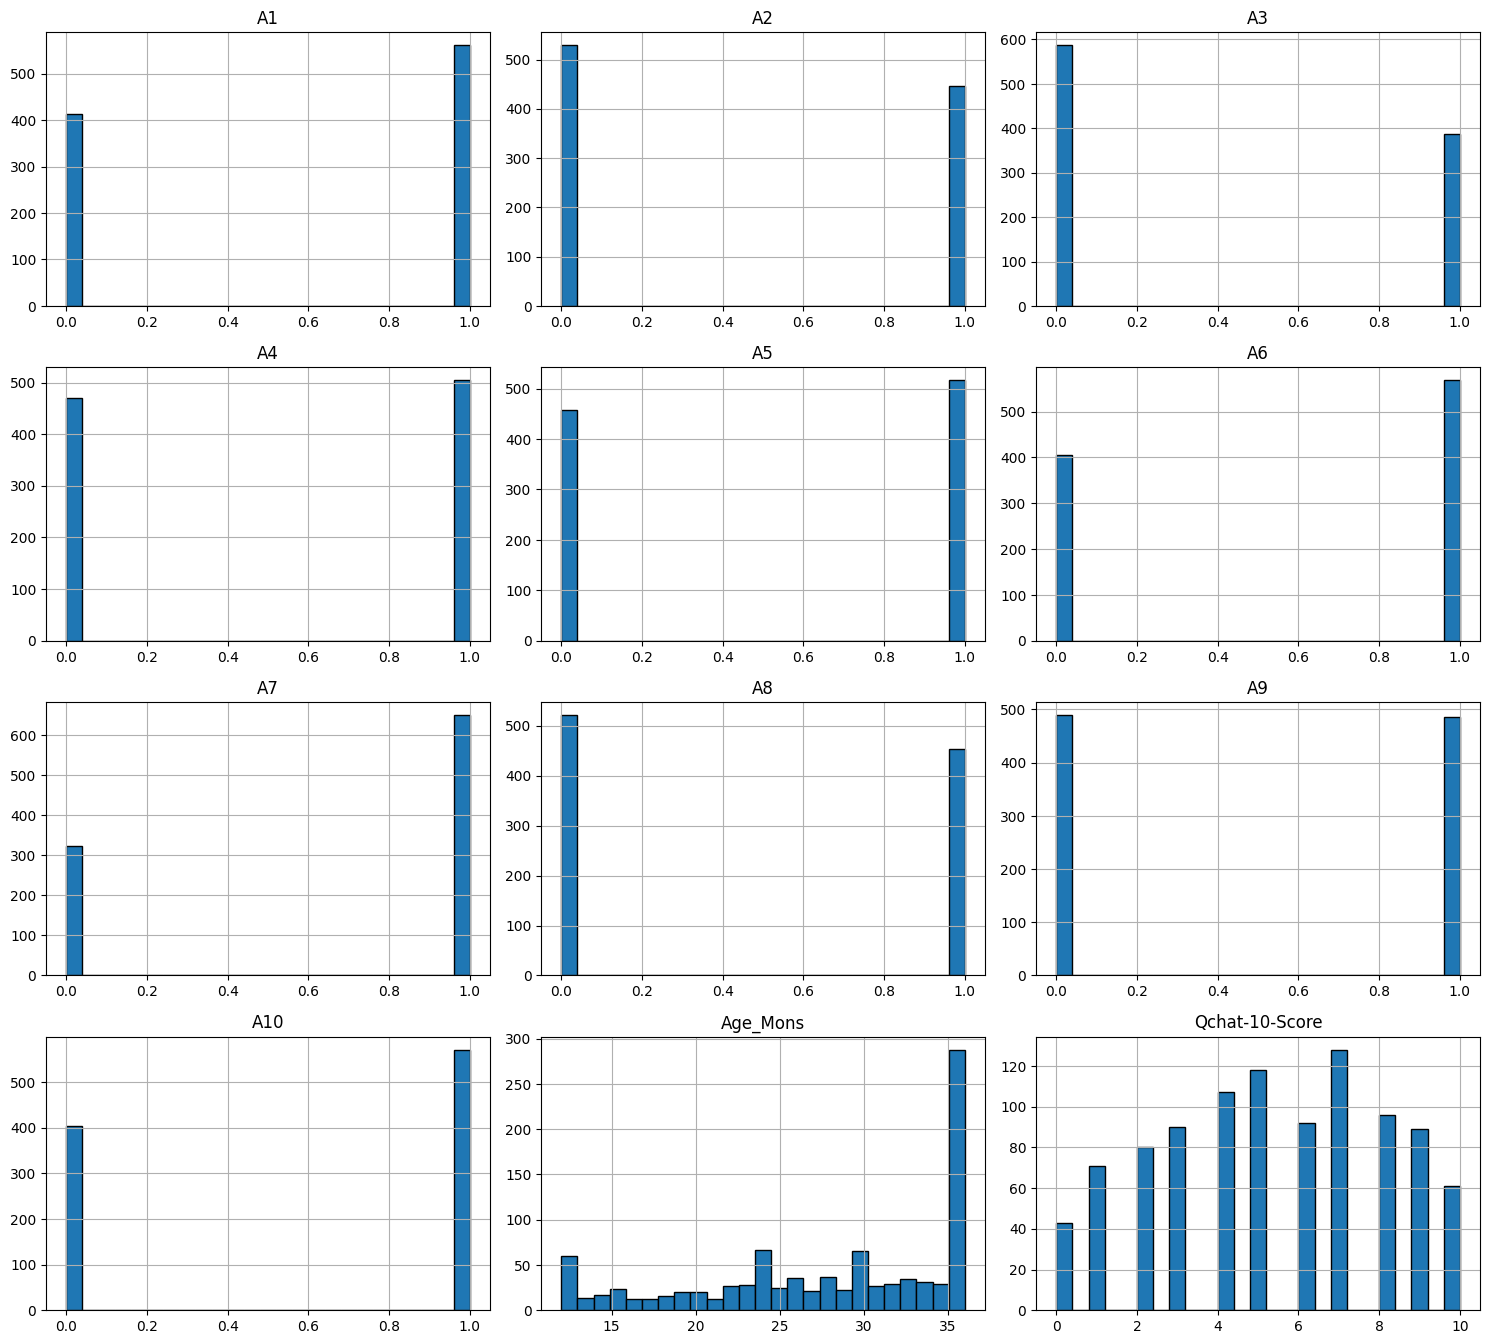

In [ ]:
df.hist(bins = 25,figsize = (15,20),layout = (6,3),edgecolor = "black")
plt.tight_layout()

checking for skewness

In [ ]:
df.dtypes

A1                         int64
A2                         int64
A3                         int64
A4                         int64
A5                         int64
A6                         int64
A7                         int64
A8                         int64
A9                         int64
A10                        int64
Age_Mons                   int64
Qchat-10-Score             int64
Sex                       object
Ethnicity                 object
Jaundice                  object
Family_mem_with_ASD       object
Who completed the test    object
Class/ASD Traits          object
dtype: object

In [ ]:
df_num = df.drop(['Sex','Ethnicity','Jaundice','Family_mem_with_ASD','Who completed the test','Class/ASD Traits '],axis = 1)

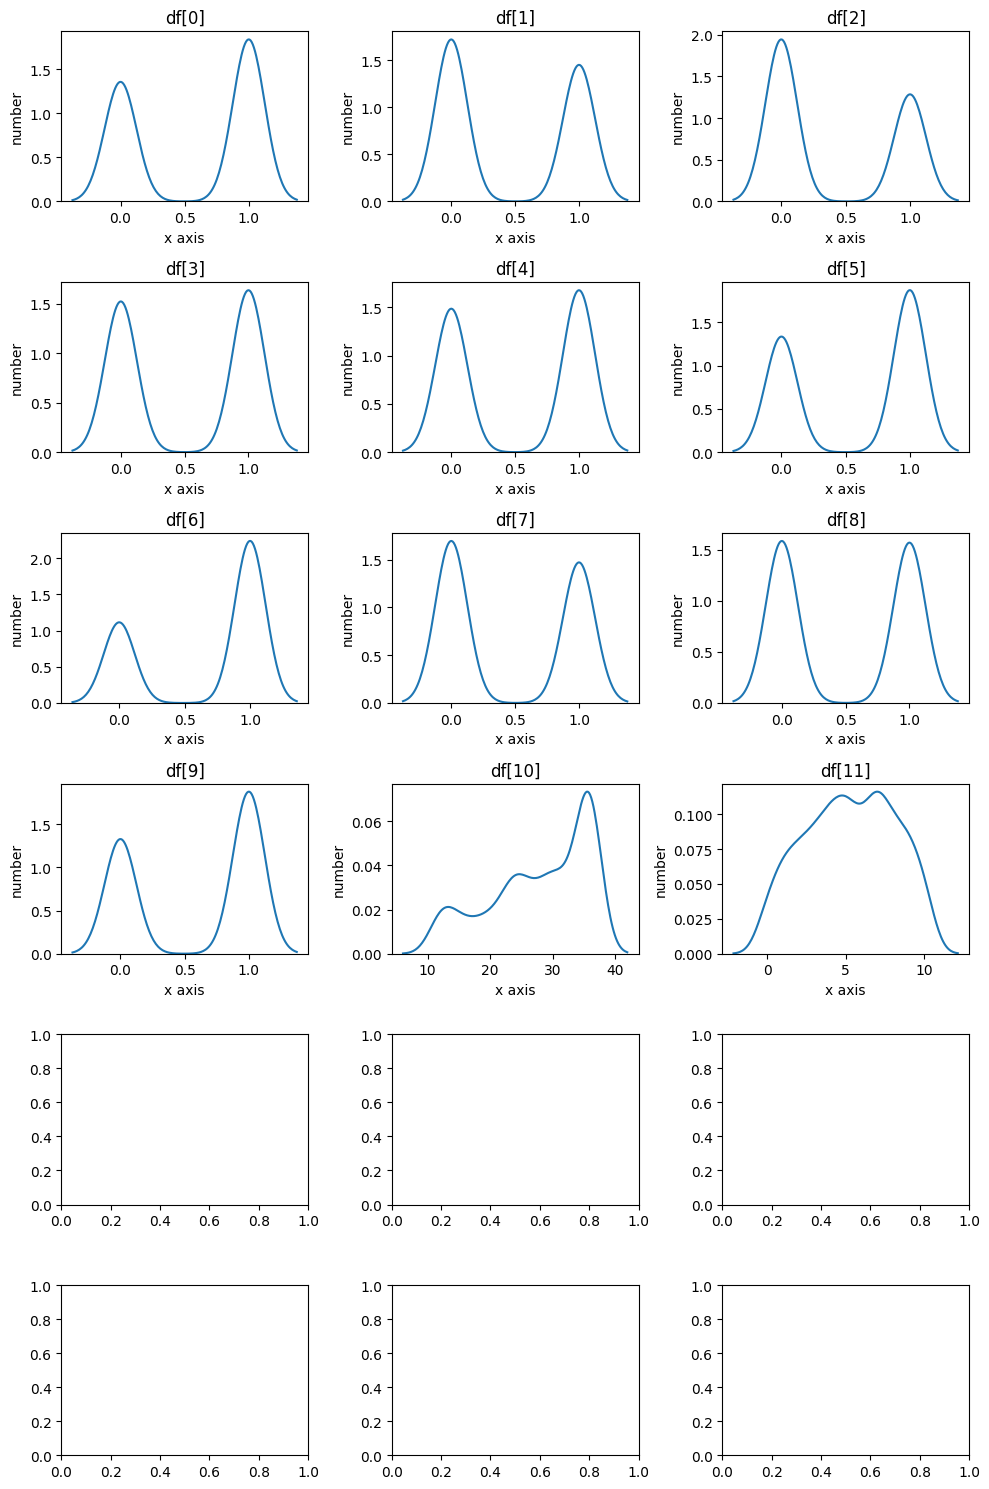

In [ ]:
num_plots = df_num.shape[1]+1
fig,axes = plt.subplots(6,3,figsize = (10,15))
axes = axes.ravel()
for i in range(num_plots):
  if i<df_num.shape[1]:
    sns.kdeplot(df_num.iloc[:,i],ax = axes[i])
    axes[i].set_title(f'df[{i}]')
    axes[i].set_xlabel('x axis')
    axes[i].set_ylabel('number')
plt.tight_layout()

In [ ]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import FunctionTransformer


In [ ]:
pt = PowerTransformer(method = 'yeo-johnson',standardize = True)
pt.fit_transform(df_num)

array([[-1.1640758 , -0.91820487, -0.81301173, ...,  0.84114841,
        -0.13275407, -0.78944658],
       [ 0.85905059,  1.08908156, -0.81301173, ..., -1.18885085,
         1.12822652, -0.42675578],
       [ 0.85905059, -0.91820487, -0.81301173, ...,  0.84114841,
         1.12822652, -0.42675578],
       ...,
       [ 0.85905059, -0.91820487,  1.22999455, ...,  0.84114841,
        -1.28081601,  1.29641605],
       [ 0.85905059, -0.91820487, -0.81301173, ...,  0.84114841,
        -1.1874404 , -0.78944658],
       [ 0.85905059,  1.08908156, -0.81301173, ..., -1.18885085,
        -0.64910741,  0.27749241]])

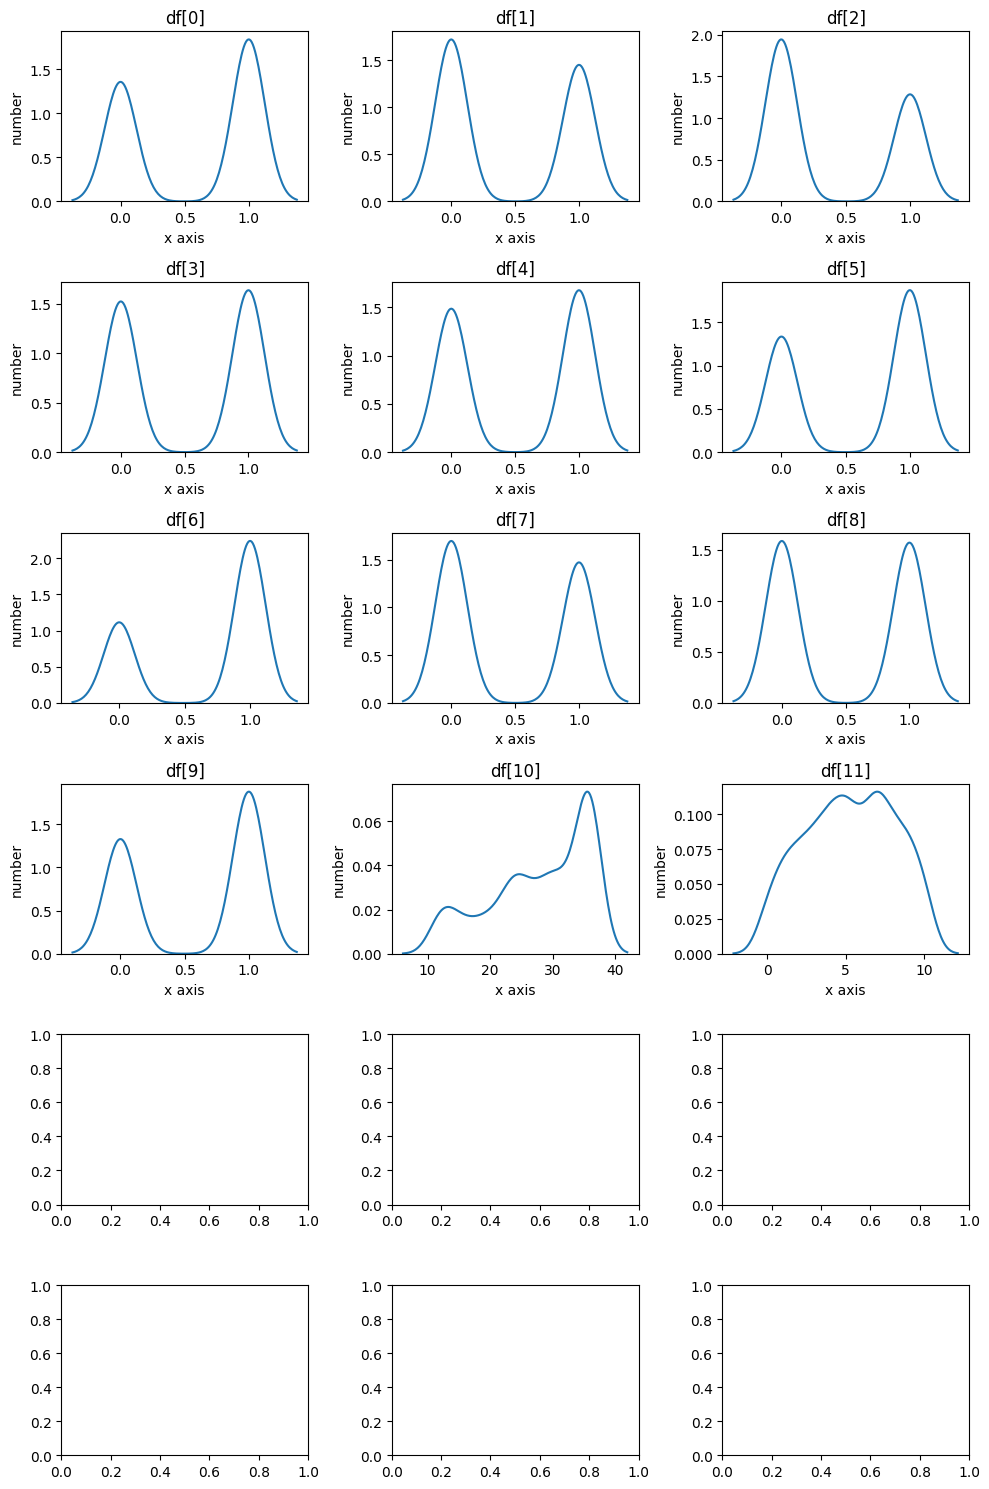

In [ ]:
num_plots = df_num.shape[1]+1
fig,axes = plt.subplots(6,3,figsize = (10,15))
axes = axes.ravel()
for i in range(num_plots):
  if i<df_num.shape[1]:
    sns.kdeplot(df_num.iloc[:,i],ax = axes[i])
    axes[i].set_title(f'df[{i}]')
    axes[i].set_xlabel('x axis')
    axes[i].set_ylabel('number')
plt.tight_layout()

In [ ]:
df_obj = df.drop(['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','Age_Mons','Qchat-10-Score'],axis = 1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
for column in df_obj.columns:
  df_obj[column] = le.fit_transform(df_obj[column])

In [ ]:
df_obj['Sex']

0       0
1       1
2       1
3       1
4       0
       ..
1049    0
1050    1
1051    1
1052    1
1053    1
Name: Sex, Length: 975, dtype: int64

In [ ]:
df_obj.head()

,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,0,8,1,0,4,0
1,1,5,1,0,4,1
2,1,8,1,0,4,1
3,1,0,0,0,4,1
4,0,5,0,1,4,1


encoding catgorical data

In [ ]:
df_final = pd.concat([df_obj,df_num],axis = 1)

In [ ]:
df_final

,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
0,0,8,1,0,4,0,0,0,0,0,0,0,1,1,0,1,28,3
1,1,5,1,0,4,1,1,1,0,0,0,1,1,0,0,0,36,4
2,1,8,1,0,4,1,1,0,0,0,0,0,1,1,0,1,36,4
3,1,0,0,0,4,1,1,1,1,1,1,1,1,1,1,1,24,10
4,0,5,0,1,4,1,1,1,0,1,1,1,1,1,1,1,20,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,0,5,0,1,4,0,0,0,0,0,0,0,0,0,0,1,24,1
1050,1,7,1,0,4,1,0,0,1,1,1,0,1,0,1,0,12,5
1051,1,8,1,0,4,1,1,0,1,1,1,1,1,1,1,1,18,9
1052,1,5,0,1,4,0,1,0,0,0,0,0,0,1,0,1,19,3


In [ ]:
figsize = (20,10)

<Axes: >

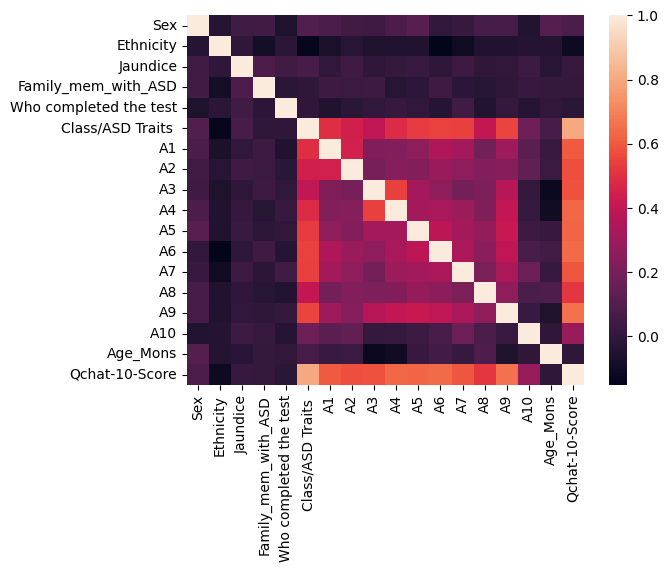

In [ ]:
sns.heatmap(df_final.corr(),annot = False)

not much correlation

In [ ]:
df_final.columns

Index(['Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Who completed the test', 'Class/ASD Traits ', 'A1', 'A2', 'A3', 'A4',
       'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons', 'Qchat-10-Score'],
      dtype='object')

In [ ]:
X = df_final.drop('Class/ASD Traits ',axis = 1)
Y = df_final['Class/ASD Traits ']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

model implementation

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix

In [ ]:
def train_model(model,X_train,X_test,Y_train,Y_test):
  model.fit(X_train,Y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(Y_test,y_pred)
  precision = precision_score(Y_test,y_pred)
  recall = recall_score(Y_test,y_pred)
  f1 = f1_score(Y_test,y_pred)
  matrix = confusion_matrix(Y_test,y_pred)
  print("confusion martrix is :")
  print(matrix)
  score_df = pd.DataFrame([[accuracy,precision,recall,f1]],columns = ['accuracy','precision','recall','f1'])
  return score_df



In [ ]:
##logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = train_model(model,X_train_scaled,X_test_scaled,Y_train,Y_test)
result.index = ['logistic regression']
result

confusion martrix is :
[[ 51   0]
 [  0 144]]


,accuracy,precision,recall,f1
logistic regression,1.0,1.0,1.0,1.0


Desicion Tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier();
dt = train_model(model,X_train_scaled,X_test_scaled,Y_train,Y_test)
dt.index = ['descision tree']
result = pd.concat([result,dt],axis = 0)
result

confusion martrix is :
[[ 51   0]
 [  0 144]]


,accuracy,precision,recall,f1
logistic regression,1.0,1.0,1.0,1.0
descision tree,1.0,1.0,1.0,1.0


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf = train_model(rf_model,X_train_scaled,X_test_scaled,Y_train,Y_test)
rf.index = ['random forest']
result = pd.concat([result,rf],axis = 0)
result

confusion martrix is :
[[ 51   0]
 [  0 144]]


,accuracy,precision,recall,f1
logistic regression,1.0,1.0,1.0,1.0
descision tree,1.0,1.0,1.0,1.0
random forest,1.0,1.0,1.0,1.0


XGBoost

> Add blockquote



In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb = train_model(xgb_model,X_train_scaled,X_test_scaled,Y_train,Y_test)
xgb.index = ['xgboost']
result = pd.concat([result,xgb],axis = 0)
result

confusion martrix is :
[[ 51   0]
 [ 24 120]]


,accuracy,precision,recall,f1
logistic regression,1.000000,1.0,1.000000,1.000000
descision tree,1.000000,1.0,1.000000,1.000000
random forest,1.000000,1.0,1.000000,1.000000
xgboost,0.876923,1.0,0.833333,0.909091


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier()
ada = train_model(ada_model,X_train_scaled,X_test_scaled,Y_train,Y_test)
ada.index = ['adaboost']
result = pd.concat([result,ada],axis = 0)
result

confusion martrix is :
[[ 51   0]
 [  0 144]]


,accuracy,precision,recall,f1
logistic regression,1.000000,1.0,1.000000,1.000000
descision tree,1.000000,1.0,1.000000,1.000000
random forest,1.000000,1.0,1.000000,1.000000
xgboost,0.876923,1.0,0.833333,0.909091
adaboost,1.000000,1.0,1.000000,1.000000


support vector classifier

In [ ]:
from sklearn.svm import SVC
svc_model = SVC()
svc = train_model(svc_model,X_train_scaled,X_test_scaled,Y_train,Y_test)
svc.index = ['support vector classifier']
result = pd.concat([result,svc],axis = 0)
result

confusion martrix is :
[[ 50   1]
 [  2 142]]


,accuracy,precision,recall,f1
logistic regression,1.000000,1.000000,1.000000,1.000000
descision tree,1.000000,1.000000,1.000000,1.000000
random forest,1.000000,1.000000,1.000000,1.000000
xgboost,0.876923,1.000000,0.833333,0.909091
adaboost,1.000000,1.000000,1.000000,1.000000
support vector classifier,0.984615,0.993007,0.986111,0.989547


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier();
knn = train_model(knn_model,X_train_scaled,X_test_scaled,Y_train,Y_test)
knn.index = ['knn']
result = pd.concat([result,knn],axis = 0)
result

confusion martrix is :
[[ 48   3]
 [ 10 134]]


,accuracy,precision,recall,f1
logistic regression,1.000000,1.000000,1.000000,1.000000
descision tree,1.000000,1.000000,1.000000,1.000000
random forest,1.000000,1.000000,1.000000,1.000000
xgboost,0.876923,1.000000,0.833333,0.909091
adaboost,1.000000,1.000000,1.000000,1.000000
support vector classifier,0.984615,0.993007,0.986111,0.989547
knn,0.933333,0.978102,0.930556,0.953737


Artificial neural network

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()

In [ ]:
input_dim = X_train.shape[1]

In [ ]:
model.add(Dense(64,activation = "relu",input_dim = input_dim))
model.add(Dense(28,activation = "relu"))
model.add(Dense(1,activation = "sigmoid"))

In [ ]:
model.compile(loss = "binary_crossentropy", optimizer = "Adam",metrics = ["accuracy"])

In [ ]:
loss = model.fit(X_train_scaled,Y_train,batch_size = 16,epochs = 100,validation_split = 0.2)

Epoch 1/100
39/39 [==============================] - 2s 9ms/step - loss: 0.5345 - accuracy: 0.8061 - val_loss: 0.3463 - val_accuracy: 0.9231
Epoch 2/100
39/39 [==============================] - 0s 4ms/step - loss: 0.2577 - accuracy: 0.9487 - val_loss: 0.1904 - val_accuracy: 0.9359
Epoch 3/100
39/39 [==============================] - 0s 3ms/step - loss: 0.1403 - accuracy: 0.9583 - val_loss: 0.1283 - val_accuracy: 0.9679
Epoch 4/100
39/39 [==============================] - 0s 4ms/step - loss: 0.0891 - accuracy: 0.9792 - val_loss: 0.0952 - val_accuracy: 0.9872
Epoch 5/100
39/39 [==============================] - 0s 3ms/step - loss: 0.0604 - accuracy: 0.9936 - val_loss: 0.0763 - val_accuracy: 0.9808
Epoch 6/100
39/39 [==============================] - 0s 4ms/step - loss: 0.0429 - accuracy: 1.0000 - val_loss: 0.0637 - val_accuracy: 0.9808
Epoch 7/100
39/39 [==============================] - 0s 3ms/step - loss: 0.0319 - accuracy: 1.0000 - val_loss: 0.0560 - val_accuracy: 0.9808
Epoch 8/100
3

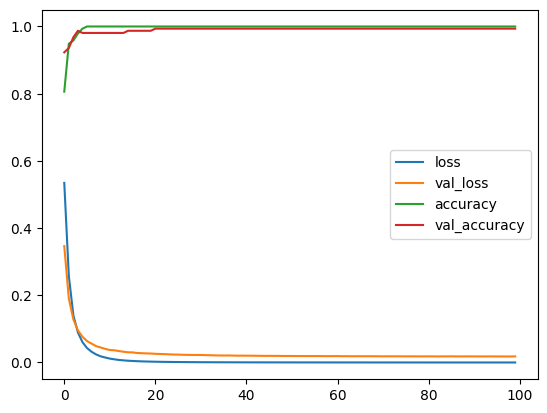

In [ ]:
plt.plot(loss.history['loss'],label = "loss")
plt.plot(loss.history['val_loss'],label = "val_loss")
plt.plot(loss.history['accuracy'],label = "accuracy")
plt.plot(loss.history['val_accuracy'],label = "val_accuracy")
plt.legend()

In [ ]:
y_pred = model.predict(X_test_scaled)
y_pred = np.where(y_pred>0.5,1,0)
accuracy = accuracy_score(Y_test,y_pred)
precision = precision_score(Y_test,y_pred)
recall = recall_score(Y_test,y_pred)
f1_score = f1_score(Y_test,y_pred)
matrix = confusion_matrix(Y_test,y_pred)
print("confusion martrix is :")
print(matrix)
score_df = pd.DataFrame([[accuracy,precision,recall,f1_score]],columns = ['accuracy','precision','recall','f1'])
print(score_df)

7/7 [==============================] - 0s 2ms/step
confusion martrix is :
[[ 51   0]
 [  0 144]]
   accuracy  precision  recall   f1
0       1.0        1.0     1.0  1.0


In [ ]:
score_df.index = ['ann']
result = pd.concat([result,score_df],axis = 0)
result

,accuracy,precision,recall,f1
logistic regression,1.000000,1.000000,1.000000,1.000000
descision tree,1.000000,1.000000,1.000000,1.000000
random forest,1.000000,1.000000,1.000000,1.000000
xgboost,0.876923,1.000000,0.833333,0.909091
adaboost,1.000000,1.000000,1.000000,1.000000
support vector classifier,0.984615,0.993007,0.986111,0.989547
knn,0.933333,0.978102,0.930556,0.953737
ann,1.000000,1.000000,1.000000,1.000000


In [ ]:
result.transpose()
result

,accuracy,precision,recall,f1
logistic regression,1.000000,1.000000,1.000000,1.000000
descision tree,1.000000,1.000000,1.000000,1.000000
random forest,1.000000,1.000000,1.000000,1.000000
xgboost,0.876923,1.000000,0.833333,0.909091
adaboost,1.000000,1.000000,1.000000,1.000000
support vector classifier,0.984615,0.993007,0.986111,0.989547
knn,0.933333,0.978102,0.930556,0.953737
ann,1.000000,1.000000,1.000000,1.000000


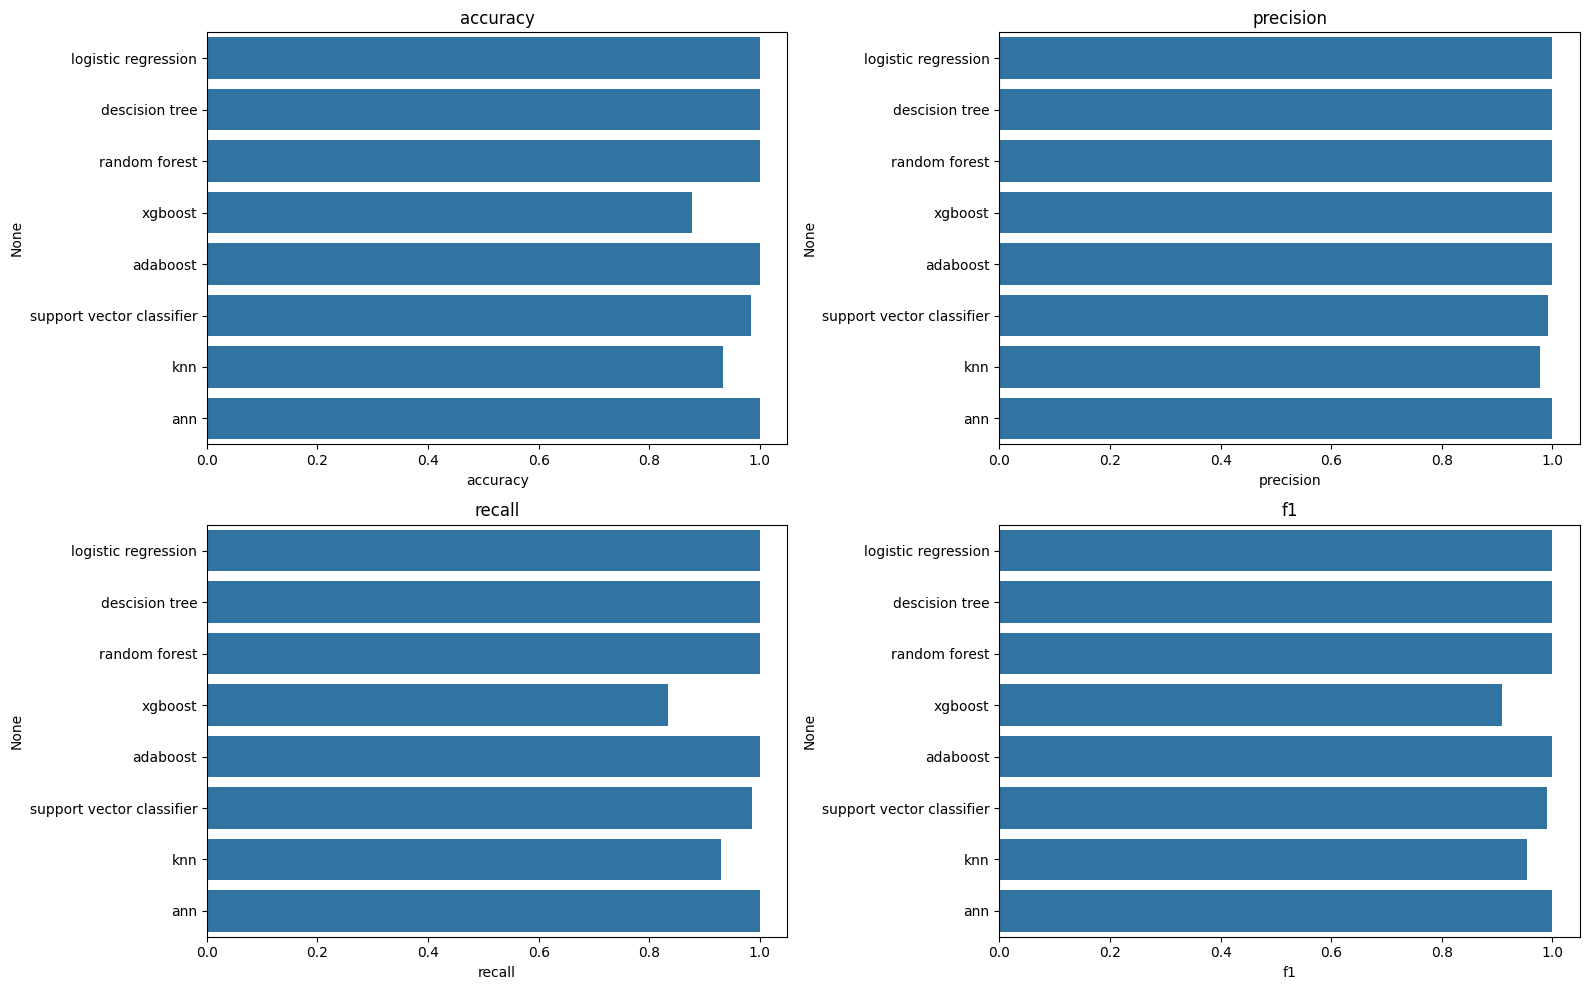

In [ ]:
fig,axes = plt.subplots(2,2,figsize = (16,10))
axes = axes.ravel();
for i,column in enumerate(result.columns):
  sns.barplot(x = result[column],y = result.index,ax = axes[i])
  axes[i].set_title(column)
plt.tight_layout()

logistic regression,descision tree,raqndom forest and ann perform the best

In [ ]:
rf_model.feature_importances_

array([0.0029648 , 0.00936151, 0.00296824, 0.00152366, 0.00107932,
       0.06339569, 0.03661609, 0.02128466, 0.04451516, 0.06601206,
       0.06920201, 0.05219541, 0.02867333, 0.11063893, 0.01194643,
       0.01217695, 0.46544576])

<Axes: >

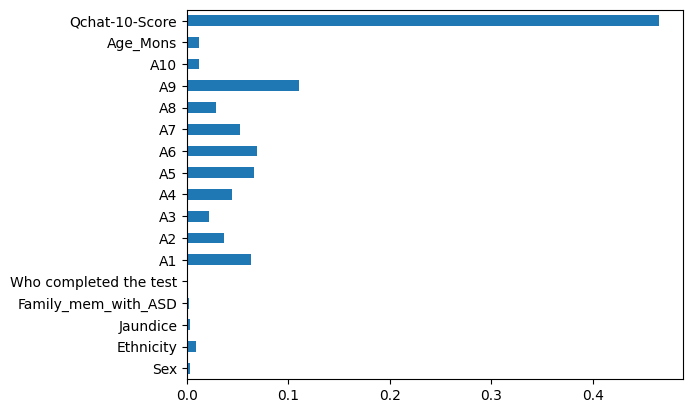

In [ ]:
pd.Series(rf_model.feature_importances_,index = X_train.columns).plot(kind = "barh")

In [ ]:
import pickle

saved_model = pickle.dump(rf_model,open('asd_model.pkl','wb'))

rf_pickle = pickle.load(open('asd_model.pkl','rb'))
rf_pickle.predict(X_test_scaled)

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0])

In [ ]:
df_final.head()

,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
0,0,8,1,0,4,0,0,0,0,0,0,0,1,1,0,1,28,3
1,1,5,1,0,4,1,1,1,0,0,0,1,1,0,0,0,36,4
2,1,8,1,0,4,1,1,0,0,0,0,0,1,1,0,1,36,4
3,1,0,0,0,4,1,1,1,1,1,1,1,1,1,1,1,24,10
4,0,5,0,1,4,1,1,1,0,1,1,1,1,1,1,1,20,9


In [ ]:
rf_pickle.predict([[1,0,0,0,4,1,1,1,1,1,1,1,1,1,1,24,10]])

array([1])

working good